## OkCupid

This is a project launched at Codecademy and it is a part of Data Scientist Career Path. More information [here](https://www.codecademy.com/learn/paths/data-science)

# Introduction

This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.


**Data sources:**

`profiles.csv` was provided by Codecademy.com.

## Project Scope

It's beneficial to create a project scope whenever a new project is being started. Below are four sections to help guide the project process and progress. The first section is the project goals, a section to define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and aligning the question(s) with the project goals. Lastly, evaluation will help build conclusions and findings from the analysis.

#### Goals

In this project, the goal is to utilize the skills learned through Codecademy and apply machine learning techniques to a data set. The primary research question that will be answered is whether an OkCupid's user astrological sign can be predicted using other variables from their profiles. This project is important since many users find astrological signs an important part of matches, and if users don't input their sign, OkCupid would like to predict which sign they might be.

#### Data

`profiles.csv` was provided by *Codecademy*. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

#### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's astrological signs, classification algorithms from the supervised learning family of machine learning models will be implemented.

#### Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 scores. 

## Import Python Modules

First import the preliminary modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load the Data

To analyze the data, load the datasets into DataFrames. Once loaded as DataFrames the data can be explored and visualized with Python.

In [2]:
df = pd.read_csv('profiles.csv')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


#### Data Characteristics

In [3]:
list(df.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [4]:
print(len(df))

59946


In [5]:
df.last_online.head()

0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object

**Summary:** our DataFrame `df` contains 59946 rows and 31 columns. 

The columns in DataFrame `df` include:

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

#### Augment your Data

In order to answer the question I've formulated, I will probably need to create some new columns in the DataFrame. This is especially true because so much of our data here is categorical.

Mapping columns in that way will be also beneficial for preparing dataset for machine learning algorithms.

In [6]:
print(df.status.value_counts())

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64


In [7]:
# status code

status_map = {'unknown': -1, 'single': 1, 'available': 2, 'seeing someone': 3, 'married': 4}
df['status_code'] = df['status'].map(status_map)

In [8]:
print(df.sex.value_counts())

m    35829
f    24117
Name: sex, dtype: int64


In [9]:
# sex code

sex_map = {'m':0, 'f':1}
df['sex_code'] = df['sex'].map(sex_map)

In [10]:
print(df.orientation.value_counts())

straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64


In [11]:
# orientation code

orientation_map = {'straight': -1, 'gay': 1, 'bisexual': 0}
df['orientation_code'] = df['orientation'].map(orientation_map)

In [12]:
# religion code 
# first column religion is cleaned and converted into clean_religion column contains 9 categories

df['clean_religion'] = df['religion'].str.split().str.get(0)
religion_map = {'unknown': -1, 'atheism': 0, 'agnosticism ': 1, 'buddhism': 2, 'catholicism': 3, 'christianity': 4,
                'hinduism': 5, 'islam': 6, 'judaism': 7, 'other': 8}
df['religion_code'] = df['clean_religion'].fillna('unknown').map(religion_map)

In [13]:
print(df.diet.value_counts())

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly kosher           18
strictly halal            18
kosher                    11
halal                     11
Name: diet, dtype: int64


In [14]:
# diet code

def get_diet(diet_str):
    if diet_str == 'unknown':
        return -1
    elif 'anything' in diet_str:
        return 0
    elif 'vegetarian' in diet_str:
        return 1
    elif 'vegan' in diet_str:
        return 2
    elif 'kosher' in diet_str:
        return 3
    elif 'halal' in diet_str:
        return 4
    elif 'other' in diet_str:
        return 5
df['diet'] = df['diet'].fillna('unknown')
df['diet_code'] = df['diet'].apply(get_diet)      

In [15]:
print(df.drinks.value_counts())

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64


In [16]:
# drinks code

drink_map = {'unknown': -1, 'not at all': 0, 'rarely': 1, 'socially': 2, 'often': 3, 'very often': 4, 'desperately': 5}
df['drinks'] = df['drinks'].fillna('unknown')
df['drink_code'] = df['drinks'].map(drink_map)

In [17]:
print(df['drugs'].value_counts())

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64


In [18]:
# drugs code

drug_map = {'unknown': -1, 'never': 0, 'sometimes': 1, 'often': 2}
df['drugs'] = df['drugs'].fillna('unknown')
df['drug_code'] = df['drugs'].map(drug_map)

In [19]:
print(df['body_type'].value_counts())

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64


In [20]:
# body code 

body_map = {'unknown': -1, 'rather not say': -1, 'used up':  0,
            'overweight': 1, 'full figured': 2, 'curvy': 3,
           'a little extra': 4, 'average': 5, 'thin': 6,
           'skinny': 7, 'athletic': 8, 'fit': 9,
           'jacked': 10}
df['body_code'] = df['body_type'].fillna('unknown').map(body_map)

In [21]:
print(df['smokes'].value_counts())

no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64


In [22]:
# smokes code

smokes_map = {'unknown': -1, 'no': 0, 'trying to quit': 1, 'sometimes': 2, 'when drinking': 3, 'yes': 4}
df['smokes_code'] = df['smokes'].fillna('unknown').map(smokes_map)

In [23]:
print(df['education'].value_counts())

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

In [24]:
# education code

education_map = {'unknown': -1, 'working on space camp': -1, 'graduated from space camp': -1,
                'dropped out of space camp': -1, 'space camp': -1,
                 'dropped out of high school': 0,
                'working on high school': 0, 'high school': 1, 'graduated from high school': 1,
                'dropped out of two-year college': 1, 'working on two-year college': 1,
                'two-year college': 2, 'graduated from two-year college': 2, 
                'dropped out of college/university': 2, 'working on college/university': 2,
                'college/university': 3, 'graduated from college/university': 3,
                'dropped out of masters program': 3, 'working on masters program': 3,
                'masters program': 4, 'graduated from masters program': 4,
                'dropped out of ph.d program': 4, 'working on ph.d program': 4,
                'ph.d program': 5, 'graduated from ph.d program': 5,
                'dropped out of law school': 4, 'working on law school': 4,
                'law school': 6, 'graduated from law school': 6,
                'dropped out of med school': 4, 'working on med school': 4,
                'med school': 7, 'graduated from med school': 7}
df['education_code'] = df['education'].fillna('unknown').map(education_map)

In [25]:
print(df['job'].value_counts())

other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64


In [26]:
# job code 

job_map = {'unknown': -1, 'rather not say': -1, 'unemployed': 0,
           'student': 1, 'transportation': 2,
           'hospitality / travel': 3, 'artistic / musical / writer': 4,
           'computer / hardware / software': 5, 'banking / financial / real estate': 6,
          'entertainment / media': 7, 'sales / marketing / biz dev': 8,
          'medicine / health': 9, 'science / tech / engineering': 10,
          'executive / management': 11, 'education / academia': 12,
          'clerical / administrative': 13, 'construction / craftsmanship': 14,
          'political / government': 15, 'law / legal services': 16,
          'military': 17, 'retired': 18, 'other': 19}
df['job_code'] = df['job'].fillna('unknown').map(job_map)

In [27]:
# ethnicity code 

df['ethnicity'] = df['ethnicity'].fillna('unknown')
df['ethnicity_white'] = df.apply(lambda x: 1 if 'white' in x['ethnicity'] else 0, axis=1)
df['ethnicity_black'] = df.apply(lambda x: 1 if 'black' in x['ethnicity'] else 0, axis=1)
df['ethnicity_other'] = df.apply(lambda x: 1 if 'other' in x['ethnicity'] else 0, axis=1)
df['ethnicity_hispanic'] = df.apply(lambda x: 1 if 'hispanic / latin' in x['ethnicity'] else 0, axis=1)
df['ethnicity_pacific_islander'] = df.apply(lambda x: 1 if 'pacific islander' in x['ethnicity'] else 0, axis=1)
df['ethnicity_native_american'] = df.apply(lambda x: 1 if 'native american' in x['ethnicity'] else 0, axis=1)
df['ethnicity_middle_eastern'] = df.apply(lambda x: 1 if 'middle eastern' in x['ethnicity'] else 0, axis=1)
df['ethnicity_indian'] = df.apply(lambda x: 1 if 'indian' in x['ethnicity'] else 0, axis=1)
df['ethnicity_asian'] = df.apply(lambda x: 1 if 'asian' in x['ethnicity'] else 0, axis=1)
df['multiracial'] = df.apply(lambda x: 1 if (x['ethnicity_white'] + x['ethnicity_black'] +
                             x['ethnicity_other'] + x['ethnicity_hispanic'] +
                             x['ethnicity_pacific_islander'] +
                             x['ethnicity_native_american'] +
                             x['ethnicity_middle_eastern'] + x['ethnicity_indian'] + 
                             x['ethnicity_asian'])>1 else 0, axis=1)

In [28]:
print(df['offspring'].value_counts())

doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: offspring, dtype: int64


In [29]:
# has kids and want kids code

def get_offspring(offspring_str):
    offspring_map = {'unknown': -1, 'doesn&rsquo;t have kids': 0,
                    'has a kid': 1, 'has kids': 2}
    if ',' not in offspring_str:
        if offspring_str in offspring_map:
            kids = offspring_str
        else:
            kids = 'unknown'
    else:
        kids = offspring_str.split(',', 1)[0]
    return offspring_map[kids]

def get_wants_kids(offspring_str):
    offspring_map = {'unknown': -1, 'and doesn&rsquo;t want any': 0,
                     'but doesn&rsquo;t want more': 0, 'doesn&rsquo;t want kids': 0,
                     'might want kids': 1, 'but might want them': 1,
                     'and might want more': 1, 'wants kids': 2,
                     'but wants them': 2, 'and wants more': 2}
    if ',' not in offspring_str:
        if offspring_str in offspring_map:
            kids = offspring_str
        else:
            kids = 'unknown'
    else:
        kids = offspring_str.split(', ', 1)[1]
    return offspring_map[kids]

df['offspring'] = df['offspring'].fillna('unknown')
df['has_kids'] = df['offspring'].apply(get_offspring)
df['wants_kids'] = df['offspring'].apply(get_wants_kids)

In [30]:
print(df['pets'].value_counts())

likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64


In [31]:
# cats code and dogs code

def get_cats_preference(pets_str):
    preference_map = {'dislikes': 0, 'likes': 1, 'has': 2}
    if 'cats' not in pets_str:
        preference_code = -1
    else:
        if 'and' in pets_str:
            pets_str = pets_str.split('and ', 1)[1]
        preference = pets_str.split(' ', 1)[0]
        preference_code = preference_map[preference]
    return preference_code

def get_dogs_preference(pets_str):
    preference_map = {'dislikes': 0, 'likes': 1, 'has': 2}
    if 'dogs' not in pets_str:
        preference_code = -1
    else:
        if 'and' in pets_str:
            pets_str = pets_str.split(' and', 1)[0]
        preference = pets_str.split(' ', 1)[0]
        preference_code = preference_map[preference]
    return preference_code

df['pets'] = df['pets'].fillna('unknown')
df['cats_code'] = df['pets'].apply(get_cats_preference)
df['dogs_code'] = df['pets'].apply(get_dogs_preference)

#### Clean Labels

As we want to build the model to predict astrological sign we need to dig into column sign a little more. As we can see in this column are 48 different answers. We want to choose only 12 which corresponds to astrological sign: aquarius, pisces, aries, taurus, gemini, cancer, leo, virgo, libra, scorpio, sagittarius, capricorn.

In [32]:
# clean sign column
df['clean_sign'] = df['sign'].str.split().str.get(0)

In [33]:
print(df['clean_sign'].value_counts())

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: clean_sign, dtype: int64


In [34]:
# sign code 
sign_map = {'unknown': -1, 'aquarius': 0, 'pisces': 1, 'aries': 2, 'taurus': 3, 'gemini': 4, 'cancer': 5,
           'leo': 6, 'virgo': 7, 'libra': 8, 'scorpio': 9, 'sagittarius': 10, 'capricorn': 11}
df['sign_code'] = df['clean_sign'].fillna('unknown').map(sign_map)

In [35]:
# shows our new list of columns in dataframe df 
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status', 'status_code',
       'sex_code', 'orientation_code', 'clean_religion', 'religion_code',
       'diet_code', 'drink_code', 'drug_code', 'body_code', 'smokes_code',
       'education_code', 'job_code', 'ethnicity_white', 'ethnicity_black',
       'ethnicity_other', 'ethnicity_hispanic', 'ethnicity_pacific_islander',
       'ethnicity_native_american', 'ethnicity_middle_eastern',
       'ethnicity_indian', 'ethnicity_asian', 'multiracial', 'has_kids',
       'wants_kids', 'cats_code', 'dogs_code', 'clean_sign', 'sign_code'],
      dtype='object')

In [36]:
df.dtypes

age                             int64
body_type                      object
diet                           object
drinks                         object
drugs                          object
education                      object
essay0                         object
essay1                         object
essay2                         object
essay3                         object
essay4                         object
essay5                         object
essay6                         object
essay7                         object
essay8                         object
essay9                         object
ethnicity                      object
height                        float64
income                          int64
job                            object
last_online                    object
location                       object
offspring                      object
orientation                    object
pets                           object
religion                       object
sex         

## Exploratory Data Analysis

### Basic demographics

The next couple of visualizations give us more insights about data we have in our dataframe `df`.

#### Gender 

Text(0.5, 1.0, 'Gender listed\nOKCupid, July, 2012')

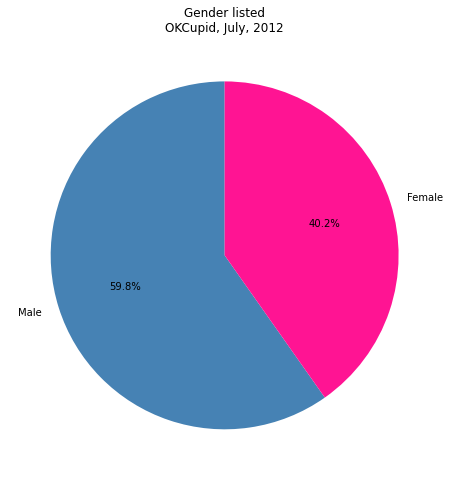

In [37]:
plt.figure(figsize=(12,8))
gender_counts = [len(df[df['sex']==i]) for i in ['m', 'f']]

plt.pie(gender_counts, colors=['SteelBlue', 'DeepPink'],
       autopct='%1.1f%%', labels=['Male', 'Female'], startangle=90)
plt.title('Gender listed\nOKCupid, July, 2012', fontsize='large')

It seems that almost 60% of data concerns mens and 40% womens.

#### Height

<Figure size 864x576 with 0 Axes>

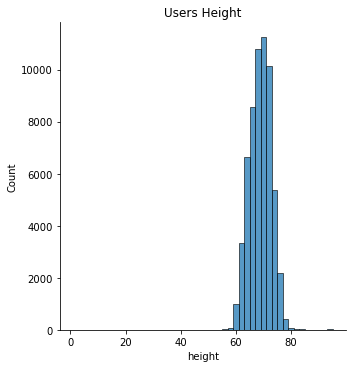

In [38]:
plt.figure(figsize=(12,8))
sns.displot(data=df, x="height", kind="hist", binwidth = 2)
plt.title('Users Height')
plt.show()

In [39]:
print(df['height'].min())
print(df['height'].max())
print(df['height'].median())

1.0
95.0
68.0


#### Age

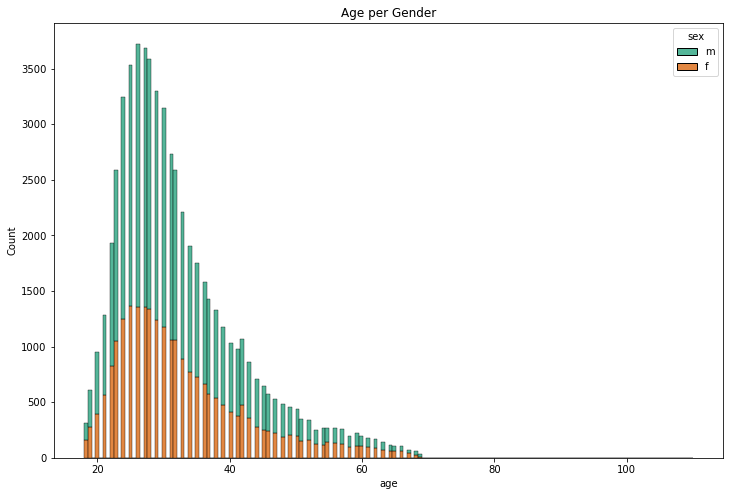

In [40]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='age', hue='sex', multiple='stack', palette='Dark2')
plt.title('Age per Gender')
plt.show()

It seems that most users are in their late 20s to early 30s and there are proportionally similar break down of gender by age, but slightly fewer females overall.

In [41]:
print(df['age'].min())
print(df['age'].max())
print(df['age'].median())

18
110
30.0


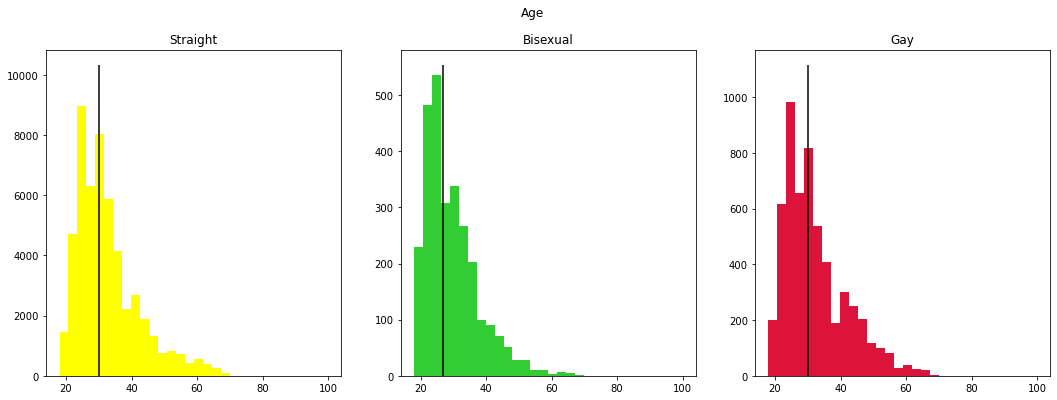

In [42]:
plt.figure(figsize=(18,6))
plt.suptitle('Age')

plt.subplot(1, 3, 1)
plt.hist(df[df['orientation_code'] == -1]['age'], range=(18, 100), bins=30, color='Yellow')
plt.vlines(x=df[df['orientation_code']==-1]['age'].median(),
            ymin=0,
            ymax=len(df[df['orientation_code']==-1])/5,
            color='black')
plt.title('Straight')

plt.subplot(1, 3, 2)
plt.hist(df[df['orientation_code'] == 0]['age'], range=(18, 100), bins=30, color='LimeGreen')
plt.vlines(x=df[df['orientation_code']==0]['age'].median(),
            ymin=0,
            ymax=len(df[df['orientation_code']==0])/5,
            color='black')
plt.title('Bisexual')

plt.subplot(1, 3, 3)
plt.hist(df[df['orientation_code'] == 1]['age'], range=(18, 100), bins=30, color='Crimson')
plt.vlines(x=df[df['orientation_code']==1]['age'].median(),
            ymin=0,
            ymax=len(df[df['orientation_code']==1])/5,
            color='black')
plt.title('Gay')


plt.show()

In [43]:
print(df[df['orientation_code']==-1]['age'].median())
print(df[df['orientation_code']==0]['age'].median())
print(df[df['orientation_code']==1]['age'].median())

30.0
27.0
30.0


The graph above shows us average age for people in different orientation status. Median age for straight and gay is 30 years and for bisexual person is 27 years. 

#### Sexuality

| Orientation | Code |
| --- | --- |
| Straight | -1 | 
| Bisexual | 0 | 
| Gay | 1 | 

Sexuality is breaking down into 3 groups: `straight`, `gay` and `bisexual`.

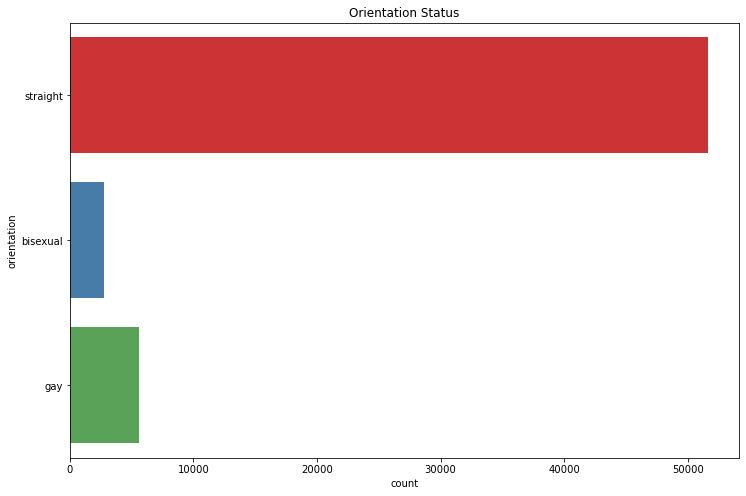

In [44]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, y='orientation', palette='Set1')
plt.title('Orientation Status')
plt.show()

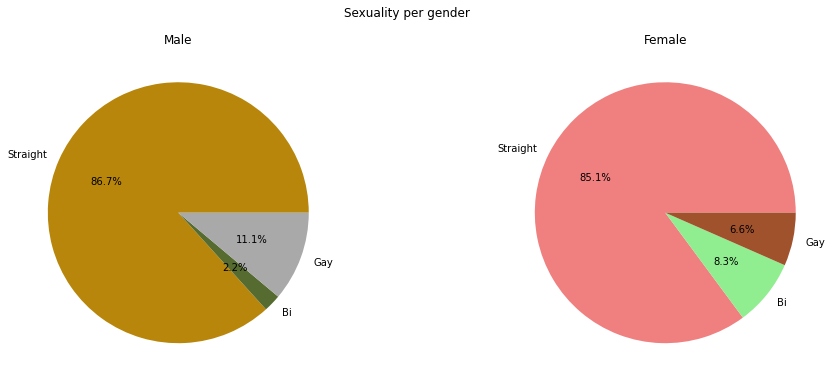

In [45]:
plt.figure(figsize=(16,6))
plt.suptitle('Sexuality per gender')

m_counts = [len(df[(df['sex']=='m') & (df['orientation_code']==i)]) for i in range(-1,2)]
f_counts = [len(df[(df['sex'] =='f') & (df['orientation_code']==i)]) for i in range (-1,2)]

plt.subplot(1, 2, 1)
plt.pie(m_counts, colors=['DarkGoldenRod', 'DarkOliveGreen', 'DarkGray'], autopct='%1.1f%%', labels=['Straight', 'Bi', 'Gay'])
plt.title('Male')

plt.subplot(1, 2, 2)
plt.pie(f_counts, colors=['LightCoral', 'LightGreen', 'Sienna'], autopct='%1.1f%%', labels=['Straight', 'Bi', 'Gay'])
plt.title('Female')

plt.show()


Both graphs shows the sexuality. First one counts the number of different orientation status. Second one shows us sexuality per gender. We can see that in both male and female case the straight status is majority with score  86.7% for male and 85.1% for female. What is also interesting to notice is the fact that gay status is 11.1% for male and only 6.6% for female. In opposition to this is bisexual status which is higher for female than male.It is 8.3% and 2.2% respectively. 

#### Relationship status

| Status | Code |
| --- | --- |
| Unknown | -1 | 
| Single | 1 | 
| Available | 2 | 
| Seeing someone | 3 |
| Married | 4 |

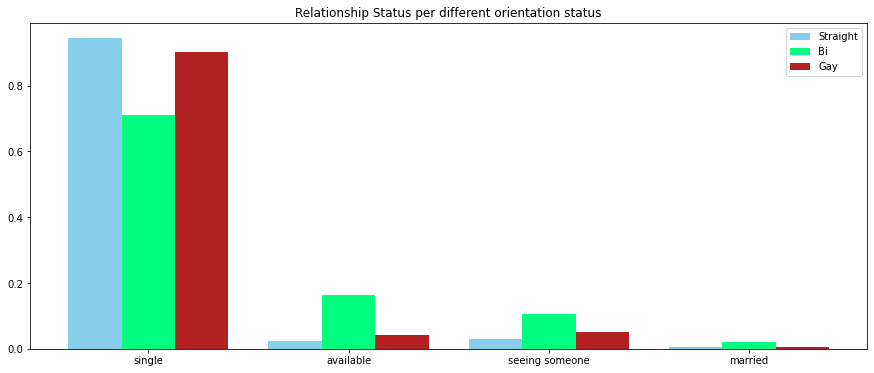

In [46]:
plt.figure(figsize=(15, 6))

labels = ['single', 'available', 'seeing someone', 'married']

straight_relationship = [len(df[(df['status']==i) & (df['orientation_code']==-1)])/
                        len(df[(df['status']!='unknown') & (df['orientation_code']==-1)]) for i in labels]

bi_relationship = [len(df[(df['status']==i) & (df['orientation_code'] == 0)]) / 
                  len(df[(df['status'] != 'unknown') & (df['orientation_code'] == 0)]) for i in labels]

gay_relationship = [len(df[(df['status'] ==i) & (df['orientation_code'] == 1)]) / 
                   len(df[(df['status'] != 'unknown') & (df['orientation_code'] == 1)]) for i in labels]

straight_pos = [3*element + 0.8*1 for element in range(4)]
bi_pos = [3*element + 0.8*2 for element in range(4)]
gay_pos = [3*element + 0.8*3 for element in range(4)]

plt.bar(straight_pos, straight_relationship, color='SkyBlue', label='Straight')
plt.bar(bi_pos, bi_relationship, color='SpringGreen', label='Bi')
plt.bar(gay_pos, gay_relationship, color='FireBrick', label='Gay')

plt.xticks([3*element + 0.8*2 for element in range(4)], labels)
plt.legend()
plt.title('Relationship Status per different orientation status')

plt.show()

The relationship status for a dating website is fairly predictable. One would assume that most people are single and available which is reflected in the data.

#### Income 

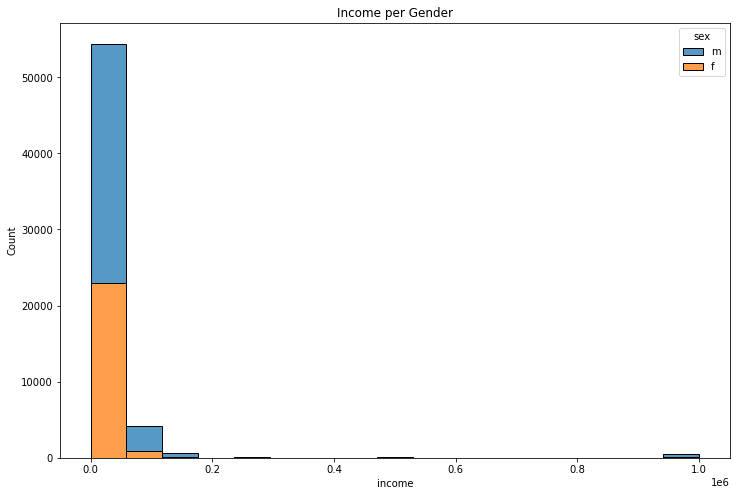

In [47]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='income', hue='sex', multiple='stack')
plt.title('Income per Gender')
plt.show()

The graph above shows that most of dating application OkCupid users did not provide information about their income.

#### Education

| Education | Code |
| --- | --- |
| Unknown | -1 | 
| High school | 1 | 
| Two-year college | 2 | 
| College/University | 3 |
| Masters program | 4 |
| Ph.d program | 5 |
| Law school | 6 |
| Med school | 7 |

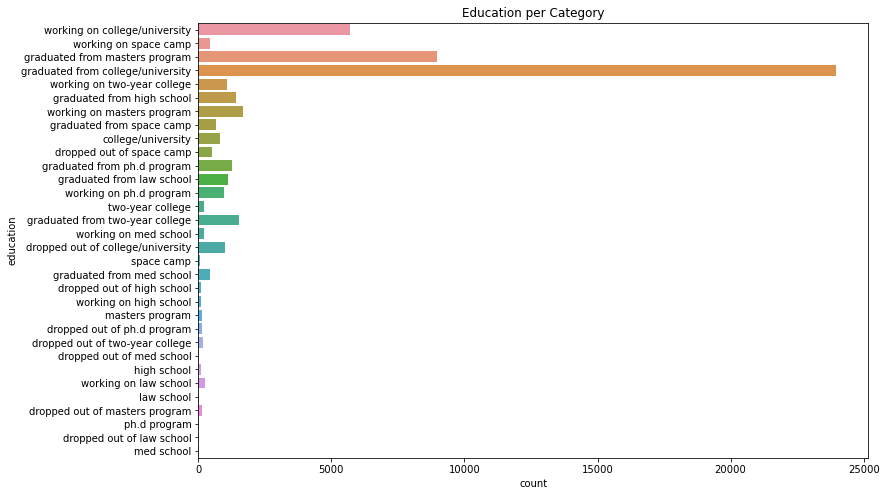

In [48]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, y='education')
plt.title('Education per Category')
plt.show()

The majority of users was graduated from college/university followed by masters programs and those working on college/university.

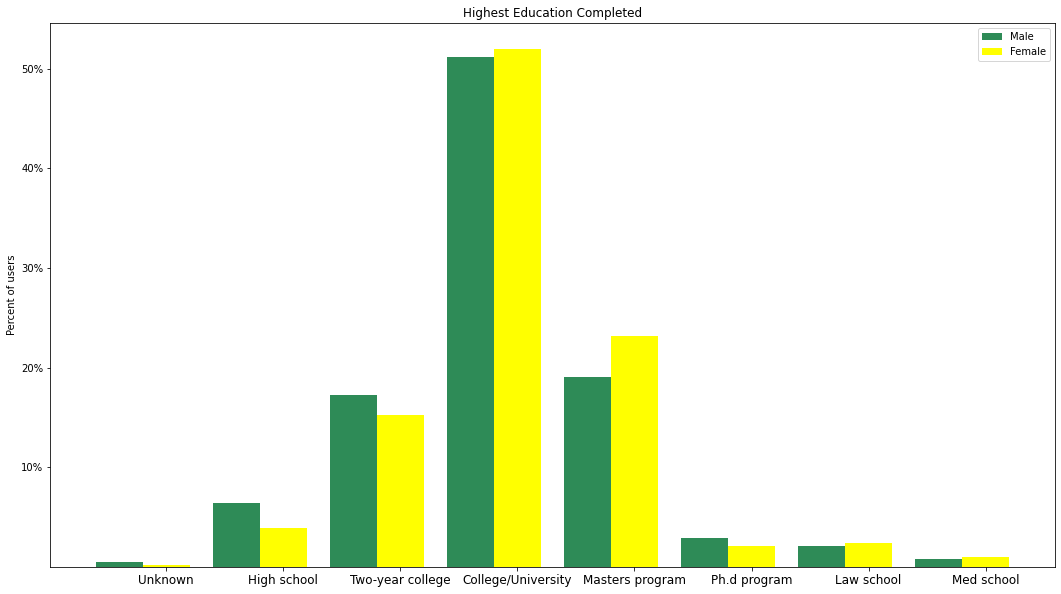

In [49]:
plt.figure(figsize=(18, 10))

male_edu = [len(df[(df['sex_code'] == 0) & (df['education_code'] == i)]) /
           len(df[(df['sex_code'] == 0) & (df['education_code'] >= 0)]) for i in range(8)]

female_edu = [len(df[(df['sex_code'] == 1) & (df['education_code'] == i)]) /
           len(df[(df['sex_code'] == 1) & (df['education_code'] >= 0)]) for i in range(8)]

edu_labels = ['Unknown', 'High school', 'Two-year college', 'College/University', 'Masters program', 
              'Ph.d program', 'Law school', 'Med school']

male_pos = [2*element + 0.8*1 for element in range(8)]
female_pos = [2*element + 0.8*2 for element in range(8)]

plt.bar(male_pos, male_edu, label='Male', color='SeaGreen')
plt.bar(female_pos, female_edu, label='Female', color='Yellow')

plt.xticks([2*element + 0.8*2 for element in range(8)], edu_labels,  fontsize='large')
plt.yticks([0.1*i for i in range(1,6)],['10%', '20%', '30%', '40%', '50%'])
plt.ylabel('Percent of users')

plt.legend()
plt.title('Highest Education Completed')

plt.show()

The bar plot above confirms the conclusion from first graph about education. As we can see around 50% of OkCupid users both male and female  was graduated from college/university. At second place with result around 20% for male and a little more than 20% for female were masters program. 

#### Job

| Job | Code |
| --- | --- |
| Unknown | -1 | 
| Unemployed | 0 | 
| Student | 1 | 
| Transportation | 2 |
| Hospitality / Travel | 3 |
| Artistic / Musical / Writer | 4 |
| Computer / Hardware / Software | 5 |
| Banking / Financial / Real Estate | 6 |
| Entertainment / Media | 7 | 
| Sales / Marketing / Biz Dev | 8 | 
| Medicine / Health | 9 |
| Science / Tech / Engineering | 10 |
| Executive / Management | 11 |
| Education / Academia | 12 |
| Clerical / Administrative | 13 |
| Construction / Craftsmanship | 14 |
| Political / Government | 15 | 
| Law / Legal Services | 16 | 
| Military | 17 |
| Retired | 18 |
| Other | 19 |

In column `job` there are 21 different options to choose. 

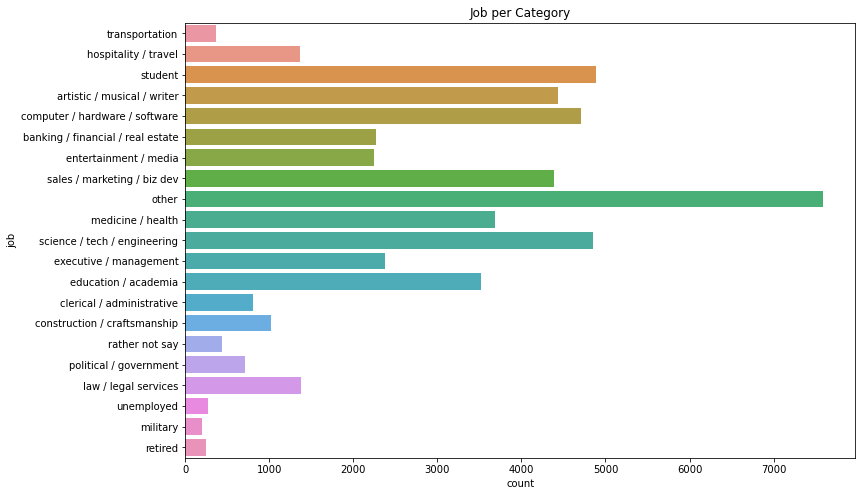

In [50]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, y='job')
plt.title('Job per Category')
plt.show()

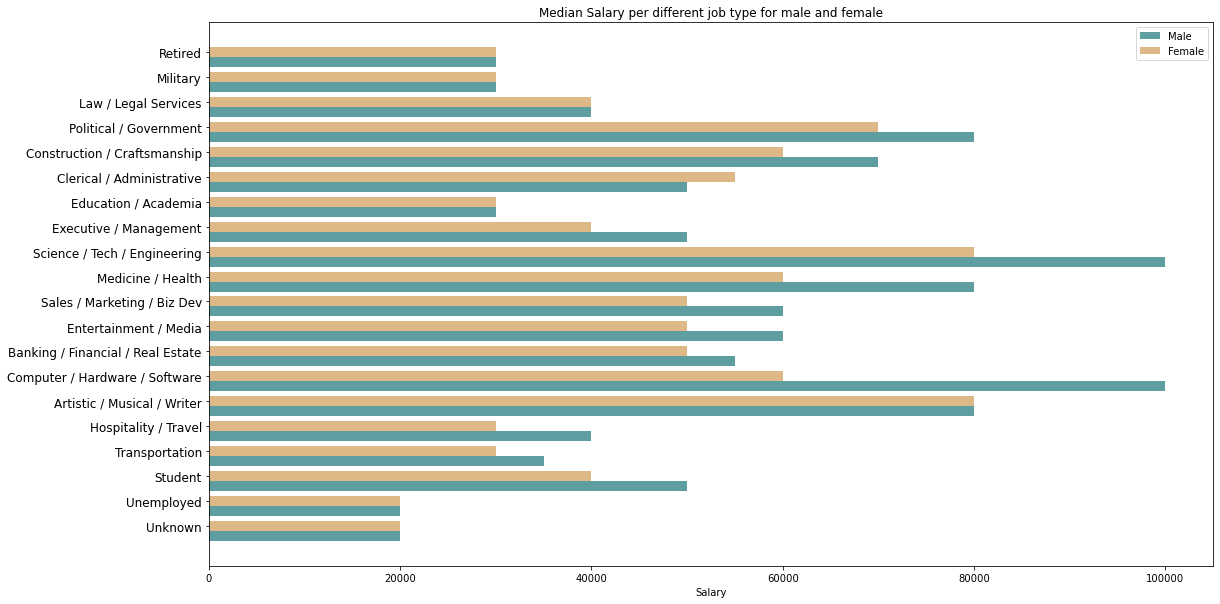

In [51]:
plt.figure(figsize=(18, 10))

male_job = [df[(df['sex_code']==0) & (df['job_code']==i) & (df['income'] > 0) 
                   & (df['income']<1000000)]['income'].median() for i in range(20)]

female_job = [df[(df['sex_code']==1) & (df['job_code']==i) & (df['income'] > 0) 
                   & (df['income']<1000000)]['income'].median() for i in range(20)]

job_labels = ['Unknown', 'Unemployed', 'Student', 'Transportation', 'Hospitality / Travel', 
              'Artistic / Musical / Writer', 'Computer / Hardware / Software', 'Banking / Financial / Real Estate',
             'Entertainment / Media', 'Sales / Marketing / Biz Dev', 'Medicine / Health', 'Science / Tech / Engineering',
             'Executive / Management', 'Education / Academia', 'Clerical / Administrative', 'Construction / Craftsmanship',
             'Political / Government', 'Law / Legal Services', 'Military', 'Retired', 'Other']

male_pos = [2*element + 0.8*1 for element in range(20)]
female_pos = [2*element + 0.8*2 for element in range(20)]

plt.barh(male_pos, male_job, label='Male', color='CadetBlue')
plt.barh(female_pos, female_job, label='Female', color='BurlyWood')

plt.yticks([2*element + 0.8*2 for element in range(20)], job_labels,  fontsize='large')
plt.xlabel('Salary')

plt.legend()
plt.title('Median Salary per different job type for male and female')

plt.show()

The graph above shows us median salary for male and female in different job type listed in our OkCupid survey.

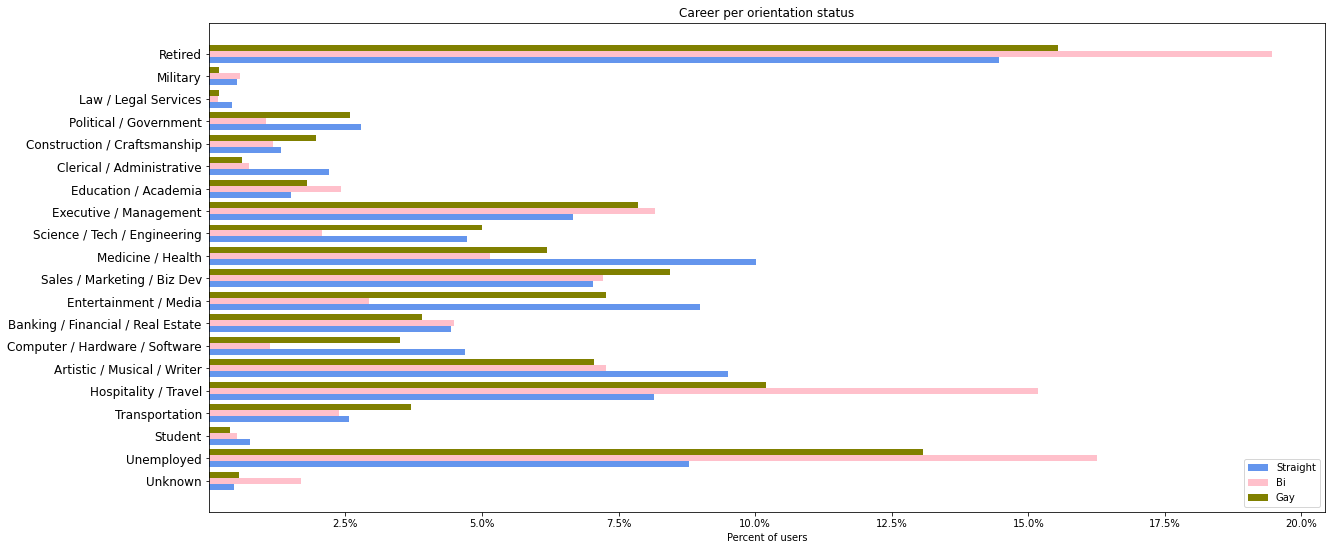

In [52]:
plt.figure(figsize=(20,9))

straight_job = [len(df[(df['orientation_code']==-1) & (df['job_code']==i)])/
              len(df[(df['orientation_code']==-1) & (df['job_code']>=0)]) for i in range(20)]

bi_job = [len(df[(df['orientation_code']==0) & (df['job_code']==i)]) / 
          len(df[(df['orientation_code'] ==0) & (df['job_code']>=0)]) for i in range(20)]

gay_job = [len(df[(df['orientation_code']==1) & (df['job_code']==i)]) /
          len(df[(df['orientation_code'] ==1) & (df['job_code'] >= 0)]) for i in range(20)]

job_labels = ['Unknown', 'Unemployed', 'Student', 'Transportation', 'Hospitality / Travel', 
              'Artistic / Musical / Writer', 'Computer / Hardware / Software', 'Banking / Financial / Real Estate',
             'Entertainment / Media', 'Sales / Marketing / Biz Dev', 'Medicine / Health', 'Science / Tech / Engineering',
             'Executive / Management', 'Education / Academia', 'Clerical / Administrative', 'Construction / Craftsmanship',
             'Political / Government', 'Law / Legal Services', 'Military', 'Retired', 'Other']


straight_pos = [3*element + 0.8*1 for element in range(20)]
bi_pos = [3*element + 0.8*2 for element in range(20)]
gay_pos = [3*element + 0.8*3 for element in range(20)]

plt.barh(straight_pos, straight_job, label='Straight', color='CornflowerBlue')
plt.barh(bi_pos, bi_job, label='Bi', color='Pink')
plt.barh(gay_pos, gay_job, label='Gay', color='Olive')

plt.yticks([3*element + 0.8*2 for element in range(20)], job_labels,  fontsize='large')
plt.xticks([0.025, 0.050, 0.075, 0.10, 0.125, 0.15, 0.175, 0.20], 
          ['2.5%', '5.0%', '7.5%', '10.0%', '12.5%', '15.0%', '17.5%', '20.0%'])
plt.xlabel('Percent of users')

plt.legend()
plt.title('Career per orientation status')
plt.show()


This graph shows us the structure in different job type by orientation status. 

#### Smokes

| Smokes | Code |
| --- | --- |
| Unknown | -1 | 
| No | 0 | 
| Trying to quit | 1 |
| Sometimes | 2 | 
| When drinking | 3 |
| Yes | 4 |

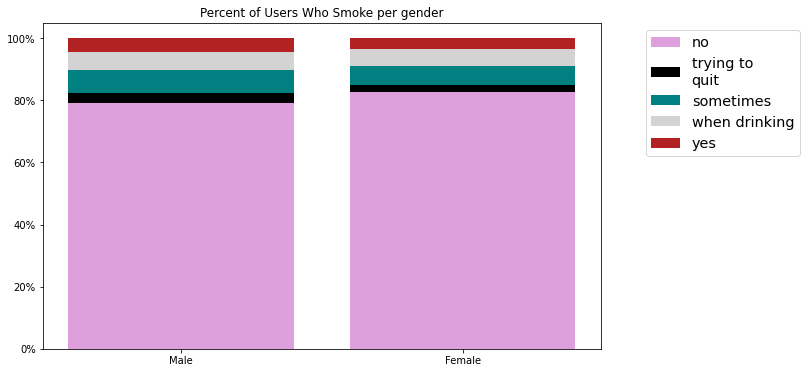

In [53]:
plt.figure(figsize=(10,6))

sex_key = ['Male', 'Female']

smokes_labels = ['no', 'trying to\nquit', 'sometimes', 'when drinking', 'yes']

smokes = [[len(df[(df['sex_code']==i) & (df['smokes_code']==j)])/
            len(df[(df['sex_code']==i) & (df['smokes_code']>=0)]) for i in range(2)] for j in range(5)]

          
bars1 = np.add(smokes[0],smokes[1]).tolist()
bars2 = np.add(bars1,smokes[2]).tolist()
bars3 = np.add(bars2,smokes[3]).tolist()
          
          
plt.bar(sex_key,
       smokes[0],
       color='Plum',
       label=smokes_labels[0])
plt.bar(sex_key,
       smokes[1],
       color='black',
       label=smokes_labels[1],
       bottom=smokes[0])
plt.bar(sex_key,
       smokes[2],
       color='Teal',
       label=smokes_labels[2],
       bottom=bars1)
plt.bar(sex_key,
       smokes[3],
       color='LightGray',
       label=smokes_labels[3],
       bottom=bars2)
plt.bar(sex_key,
       smokes[4],
       color='FireBrick',
       label=smokes_labels[4],
       bottom=bars3)

plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
plt.legend(loc=1, bbox_to_anchor=(1.37,1), fontsize='x-large')
plt.title('Percent of Users Who Smoke per gender')

plt.show()

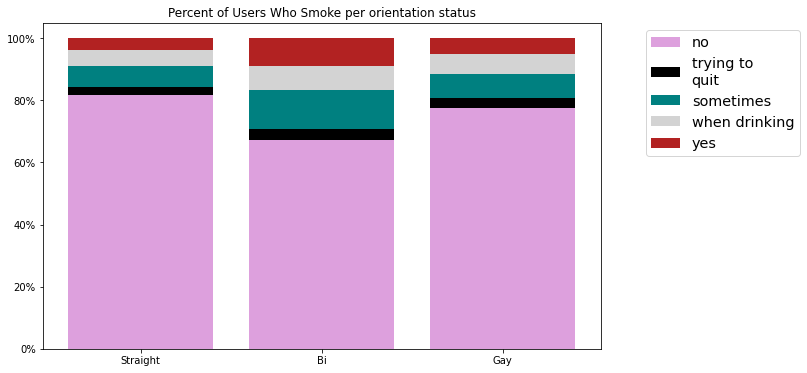

In [54]:
plt.figure(figsize=(10,6))

orientation_key = ['Straight', 'Bi', 'Gay']

smokes_labels = ['no', 'trying to\nquit', 'sometimes', 'when drinking', 'yes']

smokes = [[len(df[(df['orientation_code']==i) & (df['smokes_code']==j)])/
            len(df[(df['orientation_code']==i) & (df['smokes_code']>=0)]) for i in range(-1, 2)] for j in range(5)]

          
bars1 = np.add(smokes[0],smokes[1]).tolist()
bars2 = np.add(bars1,smokes[2]).tolist()
bars3 = np.add(bars2,smokes[3]).tolist()
          
          
plt.bar(orientation_key,
       smokes[0],
       color='Plum',
       label=smokes_labels[0])
plt.bar(orientation_key,
       smokes[1],
       color='black',
       label=smokes_labels[1],
       bottom=smokes[0])
plt.bar(orientation_key,
       smokes[2],
       color='Teal',
       label=smokes_labels[2],
       bottom=bars1)
plt.bar(orientation_key,
       smokes[3],
       color='LightGray',
       label=smokes_labels[3],
       bottom=bars2)
plt.bar(orientation_key,
       smokes[4],
       color='FireBrick',
       label=smokes_labels[4],
       bottom=bars3)

plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
plt.legend(loc=1, bbox_to_anchor=(1.37,1), fontsize='x-large')
plt.title('Percent of Users Who Smoke per orientation status')

plt.show()

#### Drugs

| Drugs | Code |
| --- | --- |
| Unknown | -1 | 
| Never | 0 | 
| Sometimes | 1 | 
| Often | 2 |

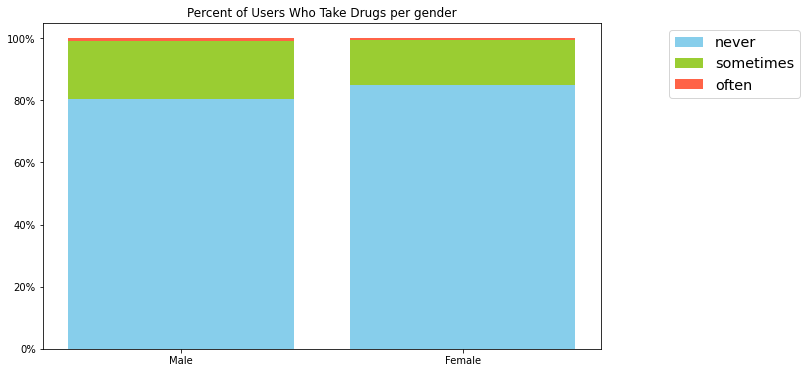

In [55]:
plt.figure(figsize=(10,6))

sex_key = ['Male', 'Female']

drug_labels = ['never', 'sometimes', 'often']

drugs = [[len(df[(df['sex_code']==i) & (df['drug_code']==j)])/
            len(df[(df['sex_code']==i) & (df['drug_code']>=0)]) for i in range(2)] for j in range(3)]

          
bars1 = np.add(drugs[0],drugs[1]).tolist()
          
          
plt.bar(sex_key,
       drugs[0],
       color='SkyBlue',
       label=drug_labels[0])
plt.bar(sex_key,
       drugs[1],
       color='YellowGreen',
       label=drug_labels[1],
       bottom=drugs[0])
plt.bar(sex_key,
       drugs[2],
       color='Tomato',
       label=drug_labels[2],
       bottom=bars1)


plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
plt.legend(loc=1, bbox_to_anchor=(1.37,1), fontsize='x-large')
plt.title('Percent of Users Who Take Drugs per gender')

plt.show()

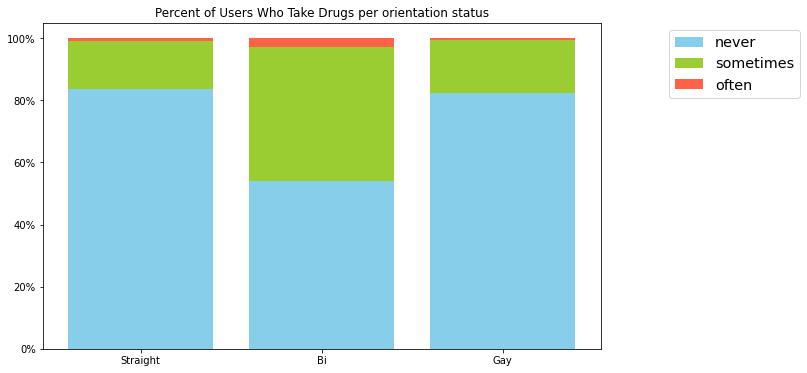

In [56]:
plt.figure(figsize=(10,6))

orientation_key = ['Straight', 'Bi', 'Gay']

drug_labels = ['never', 'sometimes', 'often']

drugs = [[len(df[(df['orientation_code']==i) & (df['drug_code']==j)])/
            len(df[(df['orientation_code']==i) & (df['drug_code']>=0)]) for i in range(-1, 2)] for j in range(3)]

          
bars1 = np.add(drugs[0],drugs[1]).tolist()
          
          
plt.bar(orientation_key,
       drugs[0],
       color='SkyBlue',
       label=drug_labels[0])
plt.bar(orientation_key,
       drugs[1],
       color='YellowGreen',
       label=drug_labels[1],
       bottom=drugs[0])
plt.bar(orientation_key,
       drugs[2],
       color='Tomato',
       label=drug_labels[2],
       bottom=bars1)


plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
plt.legend(loc=1, bbox_to_anchor=(1.37,1), fontsize='x-large')
plt.title('Percent of Users Who Take Drugs per orientation status')

plt.show()

#### Drinks 

| Drinks | Code |
| --- | --- |
| Unknown | -1 | 
| Not at all | 0 | 
| Rarely | 1 | 
| Socially | 2 |
| Often | 3 | 
| Very often | 4 | 
| Desparately | 5 |

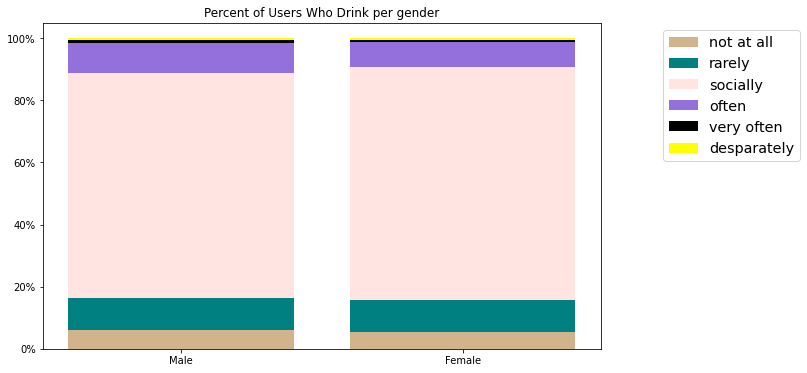

In [57]:
plt.figure(figsize=(10,6))

sex_key = ['Male', 'Female']

drinks_labels = ['not at all', 'rarely', 'socially', 'often', 'very often', 'desparately']

drinks = [[len(df[(df['sex_code']==i) & (df['drink_code']==j)])/
            len(df[(df['sex_code']==i) & (df['drink_code']>=0)]) for i in range(2)] for j in range(6)]

        
bars1 = np.add(drinks[0],drinks[1]).tolist()
bars2 = np.add(bars1,drinks[2]).tolist()
bars3 = np.add(bars2,drinks[3]).tolist()
bars4 = np.add(bars3, drinks[4]).tolist()
          
          
plt.bar(sex_key,
       drinks[0],
       color='Tan',
       label=drinks_labels[0])
plt.bar(sex_key,
       drinks[1],
       color='Teal',
       label=drinks_labels[1],
       bottom=drinks[0])
plt.bar(sex_key,
       drinks[2],
       color='MistyRose',
       label=drinks_labels[2],
       bottom=bars1)
plt.bar(sex_key,
       drinks[3],
       color='MediumPurple',
       label=drinks_labels[3],
       bottom=bars2)
plt.bar(sex_key,
       drinks[4],
       color='black',
       label=drinks_labels[4],
       bottom=bars3)
plt.bar(sex_key,
       drinks[5],
       color='yellow',
       label=drinks_labels[5],
       bottom=bars4)

plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
plt.legend(loc=1, bbox_to_anchor=(1.37,1), fontsize='x-large')
plt.title('Percent of Users Who Drink per gender')

plt.show()

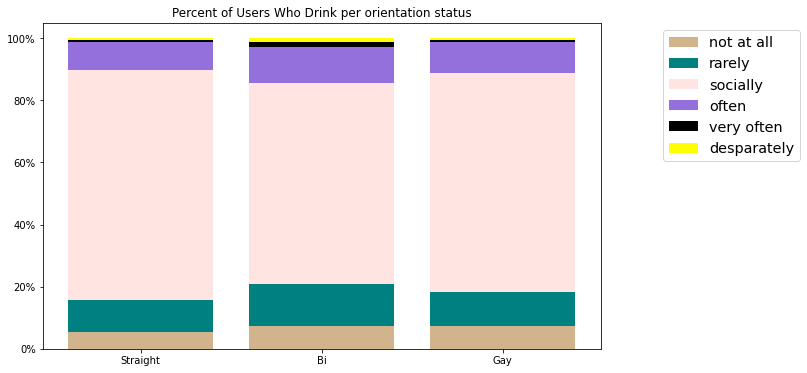

In [58]:
plt.figure(figsize=(10,6))

orientation_key = ['Straight', 'Bi', 'Gay']

drinks_labels = ['not at all', 'rarely', 'socially', 'often', 'very often', 'desparately']

drinks = [[len(df[(df['orientation_code']==i) & (df['drink_code']==j)])/
            len(df[(df['orientation_code']==i) & (df['drink_code']>=0)]) for i in range(-1, 2)] for j in range(6)]

        
bars1 = np.add(drinks[0],drinks[1]).tolist()
bars2 = np.add(bars1,drinks[2]).tolist()
bars3 = np.add(bars2,drinks[3]).tolist()
bars4 = np.add(bars3, drinks[4]).tolist()
          
          
plt.bar(orientation_key,
       drinks[0],
       color='Tan',
       label=drinks_labels[0])
plt.bar(orientation_key,
       drinks[1],
       color='Teal',
       label=drinks_labels[1],
       bottom=drinks[0])
plt.bar(orientation_key,
       drinks[2],
       color='MistyRose',
       label=drinks_labels[2],
       bottom=bars1)
plt.bar(orientation_key,
       drinks[3],
       color='MediumPurple',
       label=drinks_labels[3],
       bottom=bars2)
plt.bar(orientation_key,
       drinks[4],
       color='black',
       label=drinks_labels[4],
       bottom=bars3)
plt.bar(orientation_key,
       drinks[5],
       color='yellow',
       label=drinks_labels[5],
       bottom=bars4)

plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
plt.legend(loc=1, bbox_to_anchor=(1.37,1), fontsize='x-large')
plt.title('Percent of Users Who Drink per orientation status')

plt.show()

#### Diet

| Diet | Code |
| --- | --- |
| Unknown | -1 | 
| Anything| 0 | 
| Vegetarian | 1 | 
| Vegan | 2 |
| Kosher | 3 | 
| Halal | 4 | 
| Other | 5 |

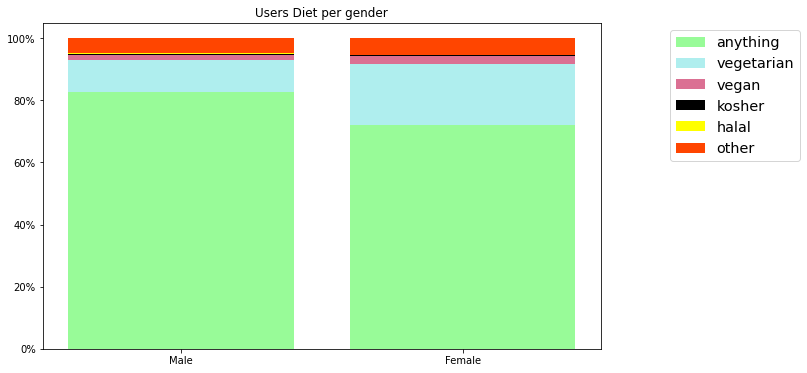

In [59]:
plt.figure(figsize=(10,6))

sex_key = ['Male', 'Female']

diet_labels = ['anything', 'vegetarian', 'vegan', 'kosher', 'halal', 'other']

diets = [[len(df[(df['sex_code']==i) & (df['diet_code']==j)])/
            len(df[(df['sex_code']==i) & (df['diet_code']>=0)]) for i in range(2)] for j in range(6)]

          
bars1 = np.add(diets[0],diets[1]).tolist()
bars2 = np.add(bars1,diets[2]).tolist()
bars3 = np.add(bars2,diets[3]).tolist()
bars4 = np.add(bars3, diets[4]).tolist()
          
          
plt.bar(sex_key,
       diets[0],
       color='PaleGreen',
       label=diet_labels[0])
plt.bar(sex_key,
       diets[1],
       color='PaleTurquoise',
       label=diet_labels[1],
       bottom=diets[0])
plt.bar(sex_key,
       diets[2],
       color='PaleVioletRed',
       label=diet_labels[2],
       bottom=bars1)
plt.bar(sex_key,
       diets[3],
       color='black',
       label=diet_labels[3],
       bottom=bars2)
plt.bar(sex_key,
       diets[4],
       color='yellow',
       label=diet_labels[4],
       bottom=bars3)
plt.bar(sex_key,
       diets[5],
       color='OrangeRed',
       label=diet_labels[5],
       bottom=bars4)

plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
plt.legend(loc=1, bbox_to_anchor=(1.37,1), fontsize='x-large')
plt.title('Users Diet per gender')

plt.show()

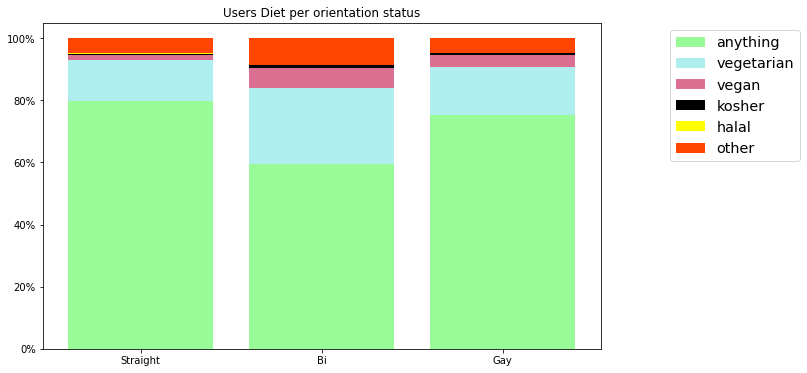

In [60]:
plt.figure(figsize=(10,6))

orientation_key = ['Straight', 'Bi', 'Gay']

diet_labels = ['anything', 'vegetarian', 'vegan', 'kosher', 'halal', 'other']

diets = [[len(df[(df['orientation_code']==i) & (df['diet_code']==j)])/
            len(df[(df['orientation_code']==i) & (df['diet_code']>=0)]) for i in range(-1, 2)] for j in range(6)]

          
bars1 = np.add(diets[0],diets[1]).tolist()
bars2 = np.add(bars1,diets[2]).tolist()
bars3 = np.add(bars2,diets[3]).tolist()
bars4 = np.add(bars3, diets[4]).tolist()
          
          
plt.bar(orientation_key,
       diets[0],
       color='PaleGreen',
       label=diet_labels[0])
plt.bar(orientation_key,
       diets[1],
       color='PaleTurquoise',
       label=diet_labels[1],
       bottom=diets[0])
plt.bar(orientation_key,
       diets[2],
       color='PaleVioletRed',
       label=diet_labels[2],
       bottom=bars1)
plt.bar(orientation_key,
       diets[3],
       color='black',
       label=diet_labels[3],
       bottom=bars2)
plt.bar(orientation_key,
       diets[4],
       color='yellow',
       label=diet_labels[4],
       bottom=bars3)
plt.bar(orientation_key,
       diets[5],
       color='OrangeRed',
       label=diet_labels[5],
       bottom=bars4)

plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
plt.legend(loc=1, bbox_to_anchor=(1.37,1), fontsize='x-large')
plt.title('Users Diet per orientation status')

plt.show()

#### Body Type

| Body | Code |
| --- | --- |
| Unknown | -1 | 
| Rather not say | -1 | 
| Used Up | 0 | 
| Overweight | 1 |
| Full Figured | 2 | 
| Curvy | 3 | 
| A little extra | 4 |
| Average | 5 | 
| Thin | 6 |
| Skinny | 7 | 
| Athletic | 8 | 
| Fit | 9 |
| Jacked | 10 |

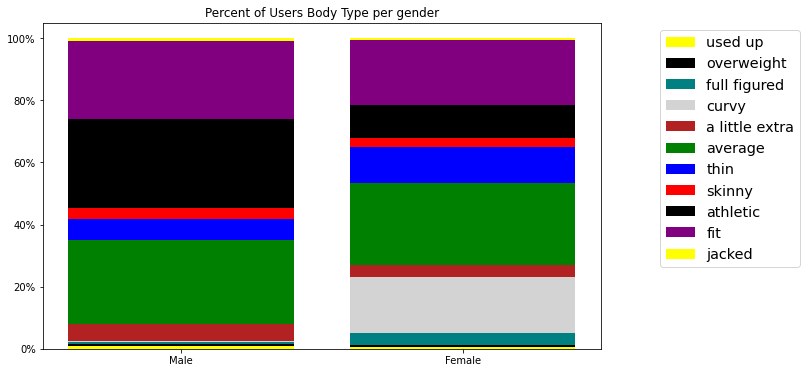

In [61]:
plt.figure(figsize=(10,6))

sex_key = ['Male', 'Female']

body_labels = ['used up', 'overweight', 'full figured', 'curvy', 'a little extra', 'average',
              'thin', 'skinny', 'athletic', 'fit', 'jacked']

body_type = [[len(df[(df['sex_code']==i) & (df['body_code']==j)])/
            len(df[(df['sex_code']==i) & (df['body_code']>=0)]) for i in range(2)] for j in range(11)]

          
bars1 = np.add(body_type[0],body_type[1]).tolist()
bars2 = np.add(bars1,body_type[2]).tolist()
bars3 = np.add(bars2,body_type[3]).tolist()
bars4 = np.add(bars3, body_type[4]).tolist()
bars5 = np.add(bars4, body_type[5]).tolist()
bars6 = np.add(bars5, body_type[6]).tolist()
bars7 = np.add(bars6, body_type[7]).tolist()
bars8 = np.add(bars7, body_type[8]).tolist()
bars9 = np.add(bars8, body_type[9]).tolist()
          
          
plt.bar(sex_key,
       body_type[0],
       color='yellow',
       label=body_labels[0])
plt.bar(sex_key,
       body_type[1],
       color='black',
       label=body_labels[1],
       bottom=body_type[0])
plt.bar(sex_key,
       body_type[2],
       color='Teal',
       label=body_labels[2],
       bottom=bars1)
plt.bar(sex_key,
       body_type[3],
       color='LightGray',
       label=body_labels[3],
       bottom=bars2)
plt.bar(sex_key,
       body_type[4],
       color='FireBrick',
       label=body_labels[4],
       bottom=bars3)
plt.bar(sex_key,
       body_type[5],
       color='green',
       label=body_labels[5],
       bottom=bars4)
plt.bar(sex_key,
       body_type[6],
       color='blue',
       label=body_labels[6],
       bottom=bars5)
plt.bar(sex_key,
       body_type[7],
       color='red',
       label=body_labels[7],
       bottom=bars6)
plt.bar(sex_key,
       body_type[8],
       color='black',
       label=body_labels[8],
       bottom=bars7)
plt.bar(sex_key,
       body_type[9],
       color='purple',
       label=body_labels[9],
       bottom=bars8)
plt.bar(sex_key,
       body_type[10],
       color='yellow',
       label=body_labels[10],
       bottom=bars9)


plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
plt.legend(loc=1, bbox_to_anchor=(1.37,1), fontsize='x-large')
plt.title('Percent of Users Body Type per gender')

plt.show()

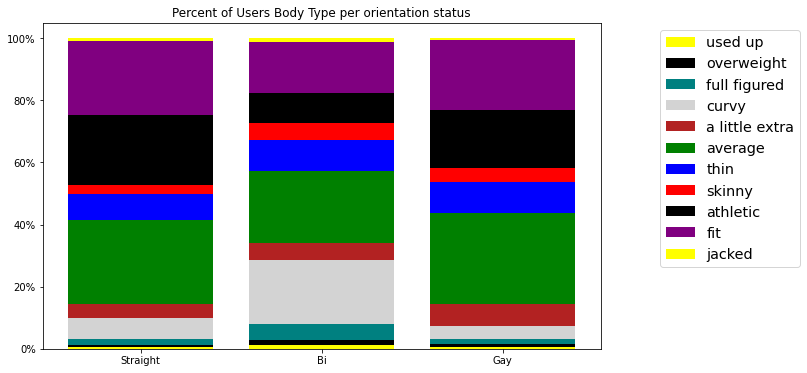

In [62]:
plt.figure(figsize=(10,6))

orientation_key = ['Straight', 'Bi', 'Gay']

body_labels = ['used up', 'overweight', 'full figured', 'curvy', 'a little extra', 'average',
              'thin', 'skinny', 'athletic', 'fit', 'jacked']

body_type = [[len(df[(df['orientation_code']==i) & (df['body_code']==j)])/
            len(df[(df['orientation_code']==i) & (df['body_code']>=0)]) for i in range(-1, 2)] for j in range(11)]

          
bars1 = np.add(body_type[0],body_type[1]).tolist()
bars2 = np.add(bars1,body_type[2]).tolist()
bars3 = np.add(bars2,body_type[3]).tolist()
bars4 = np.add(bars3, body_type[4]).tolist()
bars5 = np.add(bars4, body_type[5]).tolist()
bars6 = np.add(bars5, body_type[6]).tolist()
bars7 = np.add(bars6, body_type[7]).tolist()
bars8 = np.add(bars7, body_type[8]).tolist()
bars9 = np.add(bars8, body_type[9]).tolist()
          
          
plt.bar(orientation_key,
       body_type[0],
       color='yellow',
       label=body_labels[0])
plt.bar(orientation_key,
       body_type[1],
       color='black',
       label=body_labels[1],
       bottom=body_type[0])
plt.bar(orientation_key,
       body_type[2],
       color='Teal',
       label=body_labels[2],
       bottom=bars1)
plt.bar(orientation_key,
       body_type[3],
       color='LightGray',
       label=body_labels[3],
       bottom=bars2)
plt.bar(orientation_key,
       body_type[4],
       color='FireBrick',
       label=body_labels[4],
       bottom=bars3)
plt.bar(orientation_key,
       body_type[5],
       color='green',
       label=body_labels[5],
       bottom=bars4)
plt.bar(orientation_key,
       body_type[6],
       color='blue',
       label=body_labels[6],
       bottom=bars5)
plt.bar(orientation_key,
       body_type[7],
       color='red',
       label=body_labels[7],
       bottom=bars6)
plt.bar(orientation_key,
       body_type[8],
       color='black',
       label=body_labels[8],
       bottom=bars7)
plt.bar(orientation_key,
       body_type[9],
       color='purple',
       label=body_labels[9],
       bottom=bars8)
plt.bar(orientation_key,
       body_type[10],
       color='yellow',
       label=body_labels[10],
       bottom=bars9)


plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
plt.legend(loc=1, bbox_to_anchor=(1.37,1), fontsize='x-large')
plt.title('Percent of Users Body Type per orientation status')

plt.show()

#### Religion

| Religion | Code |
| --- | --- |
| Unknown | -1 | 
| Atheism | 0 | 
| Agnosticism  | 1 | 
| Buddhism | 2 |
| Catholicism | 3 | 
| Christianity | 4 | 
| Hinduism | 5 |
| Islam | 6 | 
| Judaism | 7 |
| Other | 8 | 

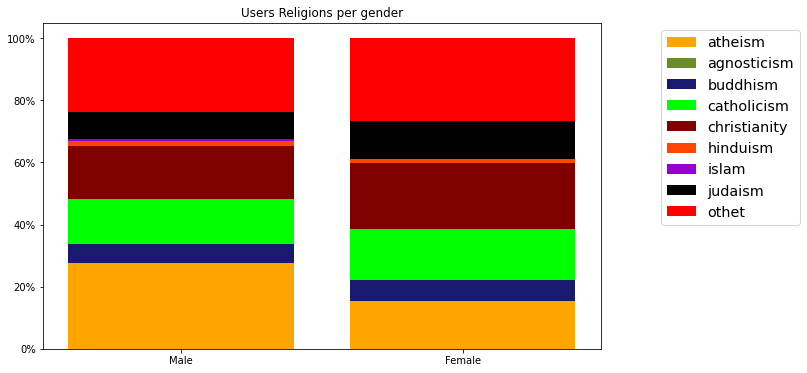

In [63]:
plt.figure(figsize=(10,6))

sex_key = ['Male', 'Female']

religion_labels = ['atheism', 'agnosticism', 'buddhism', 'catholicism', 'christianity',
                  'hinduism', 'islam', 'judaism', 'othet']

religions = [[len(df[(df['sex_code']==i) & (df['religion_code']==j)])/
            len(df[(df['sex_code']==i) & (df['religion_code']>=0)]) for i in range(2)] for j in range(9)]

          
bars1 = np.add(religions[0],religions[1]).tolist()
bars2 = np.add(bars1,religions[2]).tolist()
bars3 = np.add(bars2,religions[3]).tolist()
bars4 = np.add(bars3, religions[4]).tolist()
bars5 = np.add(bars4, religions[5]).tolist()
bars6 = np.add(bars5, religions[6]).tolist()
bars7 = np.add(bars6, religions[7]).tolist()
          
          
plt.bar(sex_key,
       religions[0],
       color='Orange',
       label=religion_labels[0])
plt.bar(sex_key,
       religions[1],
       color='OliveDrab',
       label=religion_labels[1],
       bottom=religions[0])
plt.bar(sex_key,
       religions[2],
       color='MidnightBlue',
       label=religion_labels[2],
       bottom=bars1)
plt.bar(sex_key,
       religions[3],
       color='Lime',
       label=religion_labels[3],
       bottom=bars2)
plt.bar(sex_key,
       religions[4],
       color='Maroon',
       label=religion_labels[4],
       bottom=bars3)
plt.bar(sex_key,
       religions[5],
       color='OrangeRed',
       label=religion_labels[5],
       bottom=bars4)
plt.bar(sex_key,
       religions[6],
       color='DarkViolet',
       label=religion_labels[6],
       bottom=bars5)
plt.bar(sex_key,
       religions[7],
       color='black',
       label=religion_labels[7],
       bottom=bars6)
plt.bar(sex_key,
       religions[8],
       color='red',
       label=religion_labels[8],
       bottom=bars7)


plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
plt.legend(loc=1, bbox_to_anchor=(1.37,1), fontsize='x-large')
plt.title('Users Religions per gender')

plt.show()

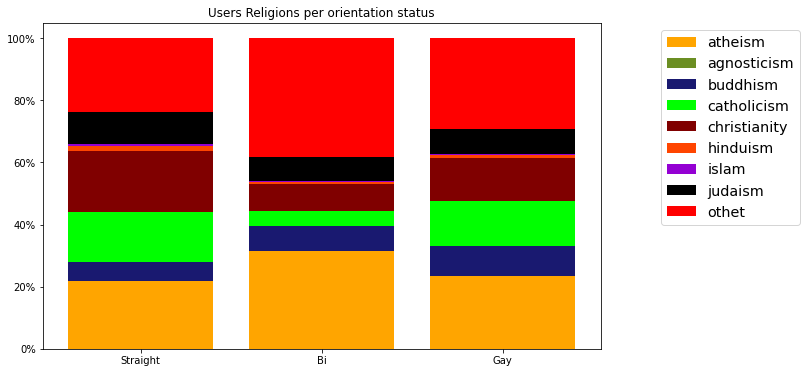

In [64]:
plt.figure(figsize=(10,6))

orientation_key = ['Straight', 'Bi', 'Gay']

religion_labels = ['atheism', 'agnosticism', 'buddhism', 'catholicism', 'christianity',
                  'hinduism', 'islam', 'judaism', 'othet']

religions = [[len(df[(df['orientation_code']==i) & (df['religion_code']==j)])/
            len(df[(df['orientation_code']==i) & (df['religion_code']>=0)]) for i in range(-1, 2)] for j in range(9)]

          
bars1 = np.add(religions[0],religions[1]).tolist()
bars2 = np.add(bars1,religions[2]).tolist()
bars3 = np.add(bars2,religions[3]).tolist()
bars4 = np.add(bars3, religions[4]).tolist()
bars5 = np.add(bars4, religions[5]).tolist()
bars6 = np.add(bars5, religions[6]).tolist()
bars7 = np.add(bars6, religions[7]).tolist()
          
          
plt.bar(orientation_key,
       religions[0],
       color='Orange',
       label=religion_labels[0])
plt.bar(orientation_key,
       religions[1],
       color='OliveDrab',
       label=religion_labels[1],
       bottom=religions[0])
plt.bar(orientation_key,
       religions[2],
       color='MidnightBlue',
       label=religion_labels[2],
       bottom=bars1)
plt.bar(orientation_key,
       religions[3],
       color='Lime',
       label=religion_labels[3],
       bottom=bars2)
plt.bar(orientation_key,
       religions[4],
       color='Maroon',
       label=religion_labels[4],
       bottom=bars3)
plt.bar(orientation_key,
       religions[5],
       color='OrangeRed',
       label=religion_labels[5],
       bottom=bars4)
plt.bar(orientation_key,
       religions[6],
       color='DarkViolet',
       label=religion_labels[6],
       bottom=bars5)
plt.bar(orientation_key,
       religions[7],
       color='black',
       label=religion_labels[7],
       bottom=bars6)
plt.bar(orientation_key,
       religions[8],
       color='red',
       label=religion_labels[8],
       bottom=bars7)


plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
plt.legend(loc=1, bbox_to_anchor=(1.37,1), fontsize='x-large')
plt.title('Users Religions per orientation status')

plt.show()

#### Ethnicity

| Ethnicity (binary) |
| ---  --- |
| Ethnicity_white | 
| Ethnicity_black | 
| Ethnicity_other | 
| Ethnicity_hispanic |
| Ethnicity_pacific_islander | 
| Ethnicity_native_american | 
| Ethnicity_middle_eastern |
| Ethnicity_indian | 
| Ethnicity_asian |
| Multiracial | 

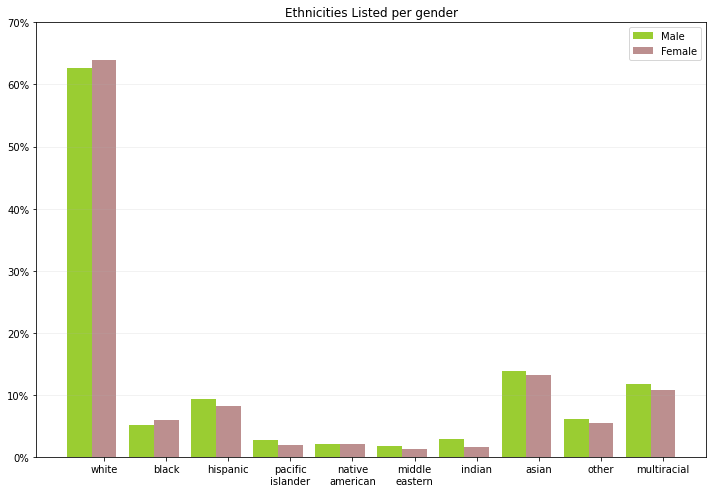

In [65]:
plt.figure(figsize=(12,8))

ethnicity_labels = ['white', 'black', 'hispanic', 'pacific\nislander',
                    'native\namerican', 'middle\neastern', 'indian', 'asian', 'other',
                   'multiracial']

ethnicity_rows = ['ethnicity_white', 'ethnicity_black',
                  'ethnicity_hispanic', 'ethnicity_pacific_islander',
                  'ethnicity_native_american', 'ethnicity_middle_eastern',
                  'ethnicity_indian', 'ethnicity_asian', 'ethnicity_other',
                 'multiracial']

male_ethnicity = [len(df[(df['sex_code']==0) & (df[i]>0)])/
                      len(df[df['sex_code']==0]) for i in ethnicity_rows]

female_ethnicity = [len(df[(df['sex_code']==1) & (df[i]>0)])/
                len(df[df['sex_code']==1]) for i in ethnicity_rows]


male_pos = [2*element + 0.8*1 for element in range(10)]
female_pos = [2*element + 0.8*2 for element in range(10)]


plt.bar(male_pos, male_ethnicity, color='YellowGreen', label='Male')
plt.bar(female_pos, female_ethnicity, color='RosyBrown', label='Female')


plt.xticks([2*element + 0.8*2 for element in range(10)], ethnicity_labels)
plt.yticks([0.1*i for i in range(8)], [str(10*i)+'%' for i in range(8)])

plt.legend()
plt.gca().yaxis.grid(True, alpha=0.2)
plt.title('Ethnicities Listed per gender')


plt.show()

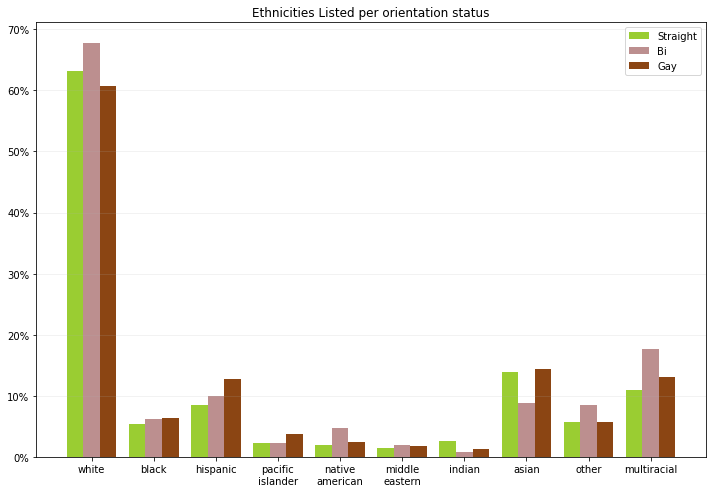

In [66]:
plt.figure(figsize=(12,8))

ethnicity_labels = ['white', 'black', 'hispanic', 'pacific\nislander',
                    'native\namerican', 'middle\neastern', 'indian', 'asian', 'other',
                   'multiracial']

ethnicity_rows = ['ethnicity_white', 'ethnicity_black',
                  'ethnicity_hispanic', 'ethnicity_pacific_islander',
                  'ethnicity_native_american', 'ethnicity_middle_eastern',
                  'ethnicity_indian', 'ethnicity_asian', 'ethnicity_other',
                 'multiracial']

straight_ethnicity = [len(df[(df['orientation_code']==-1) & (df[i]>0)])/
                      len(df[df['orientation_code']==-1]) for i in ethnicity_rows]

bi_ethnicity = [len(df[(df['orientation_code']==0) & (df[i]>0)])/
                len(df[df['orientation_code']==0]) for i in ethnicity_rows]

gay_ethnicity = [len(df[(df['orientation_code']==1) & (df[i]>0)])/
                 len(df[df['orientation_code']==1]) for i in ethnicity_rows]

straight_pos = [3*element + 0.8*1 for element in range(10)]
bi_pos = [3*element + 0.8*2 for element in range(10)]
gay_pos = [3*element + 0.8*3 for element in range(10)]

plt.bar(straight_pos, straight_ethnicity, color='YellowGreen', label='Straight')
plt.bar(bi_pos, bi_ethnicity, color='RosyBrown', label='Bi')
plt.bar(gay_pos, gay_ethnicity, color='SaddleBrown', label='Gay')

plt.xticks([3*element + 0.8*2 for element in range(10)], ethnicity_labels)
plt.yticks([0.1*i for i in range(8)], [str(10*i)+'%' for i in range(8)])

plt.legend()
plt.gca().yaxis.grid(True, alpha=0.2)
plt.title('Ethnicities Listed per orientation status')


plt.show()

#### Sign

| Sign | Code |
| --- | --- |
| Unknown | -1 | 
| Aquarius | 0 | 
| Pisces  | 1 | 
| Aries | 2 |
| Taurus | 3 | 
| Gemini | 4 | 
| Cancer | 5 |
| Leo | 6 | 
| Virgo | 7 |
| Libra | 8 | 
| Scorpio | 9 |
| Sagittarius | 10 | 
| Capricorn | 11 |

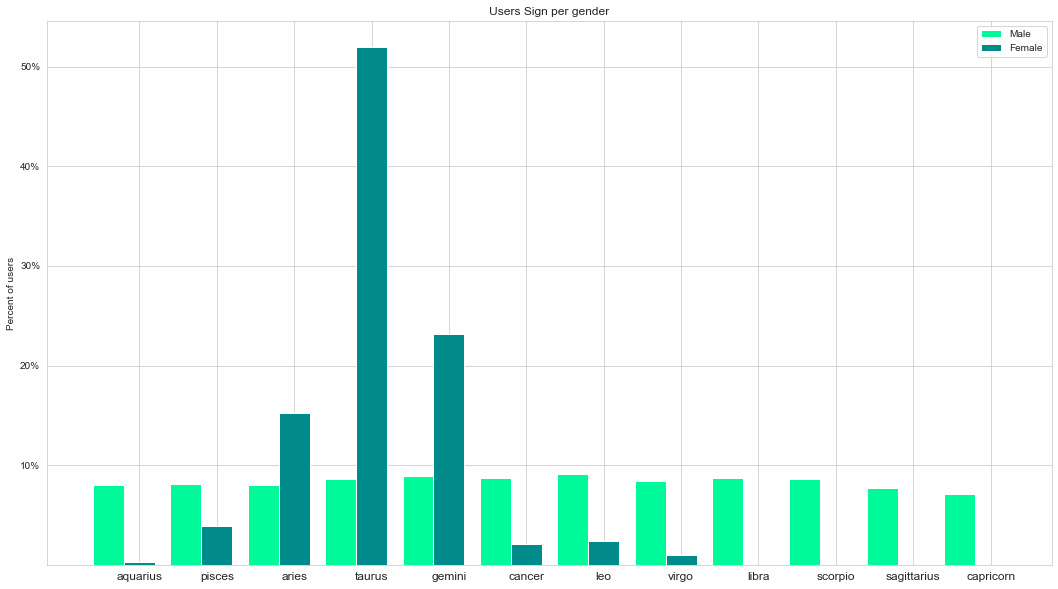

In [67]:
plt.figure(figsize=(18, 10))
sns.set_style('whitegrid')

male_sign = [len(df[(df['sex_code'] == 0) & (df['sign_code'] == i)]) /
           len(df[(df['sex_code'] == 0) & (df['sign_code'] >= 0)]) for i in range(12)]

female_sign = [len(df[(df['sex_code'] == 1) & (df['education_code'] == i)]) /
           len(df[(df['sex_code'] == 1) & (df['education_code'] >= 0)]) for i in range(12)]

sign_labels = ['aquarius', 'pisces', 'aries', 'taurus', 'gemini', 'cancer', 'leo', 'virgo', 'libra',
              'scorpio', 'sagittarius', 'capricorn']

male_pos = [2*element + 0.8*1 for element in range(12)]
female_pos = [2*element + 0.8*2 for element in range(12)]

plt.bar(male_pos, male_sign, label='Male', color='MediumSpringGreen')
plt.bar(female_pos, female_sign, label='Female', color='DarkCyan')

plt.xticks([2*element + 0.8*2 for element in range(12)], sign_labels,  fontsize='large')
plt.yticks([0.1*i for i in range(1,6)],['10%', '20%', '30%', '40%', '50%'])
plt.ylabel('Percent of users')

plt.legend()
plt.title('Users Sign per gender')

plt.show()

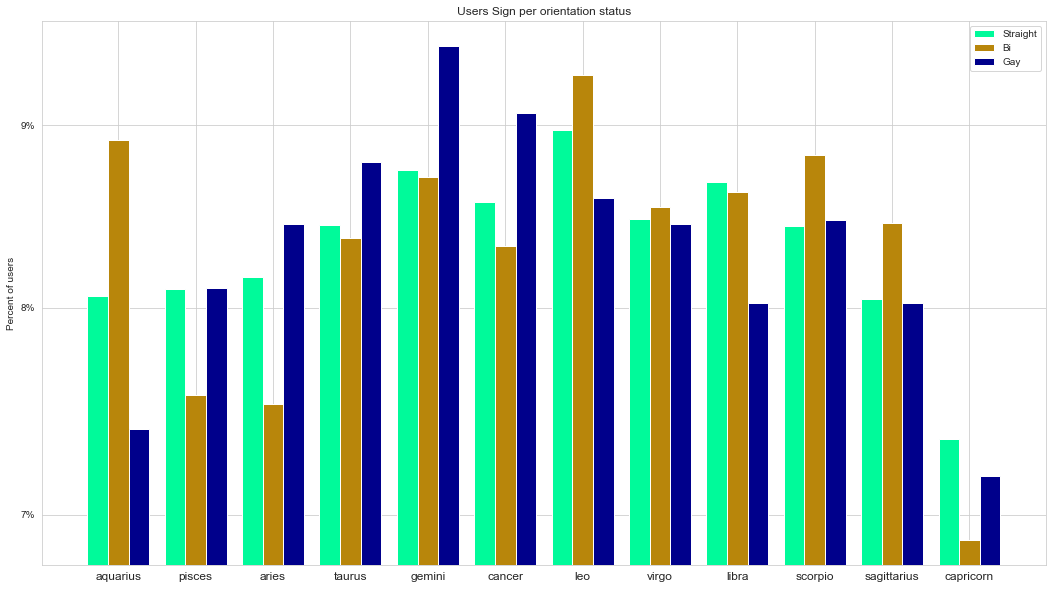

In [68]:
plt.figure(figsize=(18, 10))

straight_sign = [len(df[(df['orientation_code'] == -1) & (df['sign_code'] == i)]) /
           len(df[(df['orientation_code'] == -1) & (df['sign_code'] >= 0)]) for i in range(12)]

bi_sign = [len(df[(df['orientation_code'] == 0) & (df['sign_code'] == i)]) /
           len(df[(df['orientation_code'] == 0) & (df['sign_code'] >= 0)]) for i in range(12)]

gay_sign = [len(df[(df['orientation_code'] == 1) & (df['sign_code'] == i)]) /
           len(df[(df['orientation_code'] == 1) & (df['sign_code'] >= 0)]) for i in range(12)]

sign_labels = ['aquarius', 'pisces', 'aries', 'taurus', 'gemini', 'cancer', 'leo', 'virgo', 'libra',
              'scorpio', 'sagittarius', 'capricorn']

straight_pos = [3*element + 0.8*1 for element in range(12)]
bi_pos = [3*element + 0.8*2 for element in range(12)]
gay_pos = [3*element + 0.8*3 for element in range(12)]

plt.bar(straight_pos, straight_sign, label='Straight', color='MediumSpringGreen')
plt.bar(bi_pos, bi_sign, label='Bi', color='DarkGoldenRod')
plt.bar(gay_pos, gay_sign, label='Gay', color='DarkBlue')

plt.xticks([3*element + 0.8*2 for element in range(12)], sign_labels,  fontsize='large')

plt.yscale('log')
plt.yticks([0.01*i for i in range(7,10)],['7%', '8%', '9%'])
plt.ylabel('Percent of users')


plt.legend()
plt.title('Users Sign per orientation status')

plt.show()

#### Pets

| Cats | Code |
| --- | --- |
| Unknown | -1 | 
| Dislikes| 0 | 
| Likes | 1 | 
| Has | 2 |

| Dogs | Code |
| --- | --- |
| Unknown | -1 | 
| Dislikes| 0 | 
| Likes | 1 | 
| Has | 2 |

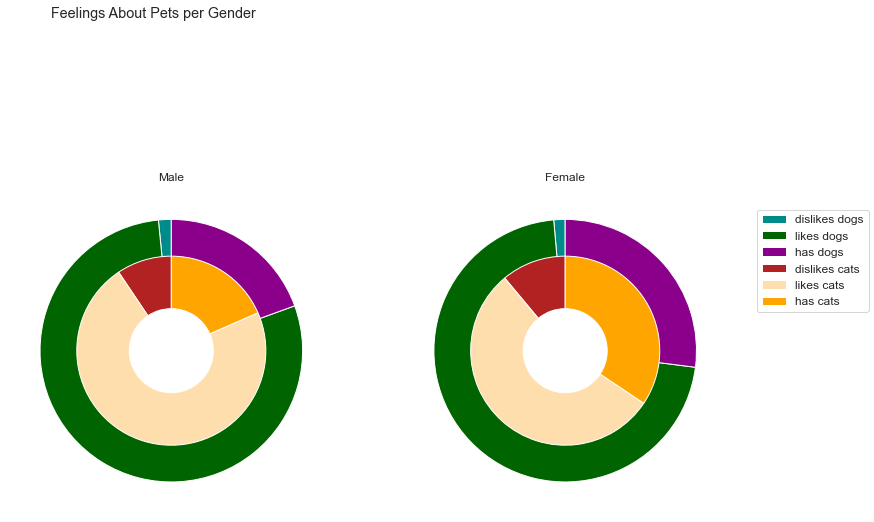

In [69]:
sex_key = ['Male', 'Female']
fig = plt.figure(figsize=(20,10))
plt.suptitle('Feelings About Pets per Gender', fontsize='x-large')
size=.4
for j in range(2):
    plt.subplot(1,3,j+2)
    cats_count = [len(df[(df['sex_code']==j) & (df['cats_code']==i)]) for i in range(3)]
    dogs_count = [len(df[(df['sex_code']==j) & (df['dogs_code']==i)]) for i in range(3)]

    plt.pie(dogs_count, startangle=90, colors=['DarkCyan', 'DarkGreen', 'DarkMagenta'],
           wedgeprops=dict(width=size, edgecolor='w'))
    plt.pie(cats_count, startangle=90, colors=['FireBrick', 'NavajoWhite', 'Orange'],
            radius=.72, wedgeprops=dict(width=size, edgecolor='w'))
    plt.title(sex_key[j], fontsize='large')

fig.legend(labels=['dislikes dogs', 'likes dogs', 'has dogs',
                  'dislikes cats', 'likes cats', 'has cats'],
           loc=7, fontsize='large')


plt.show()

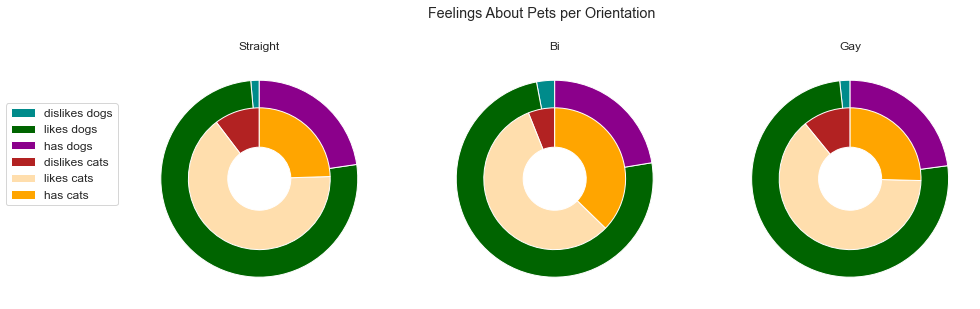

In [70]:
fig = plt.figure(figsize=(15,5))
plt.suptitle('Feelings About Pets per Orientation', fontsize='x-large')
size=.4
for j in range(-1,2):
    plt.subplot(1,3,j+2)
    cats_count = [len(df[(df['orientation_code']==j) & (df['cats_code']==i)]) for i in range(3)]
    dogs_count = [len(df[(df['orientation_code']==j) & (df['dogs_code']==i)]) for i in range(3)]

    plt.pie(dogs_count, startangle=90, colors=['DarkCyan', 'DarkGreen', 'DarkMagenta'],
           wedgeprops=dict(width=size, edgecolor='w'))
    plt.pie(cats_count, startangle=90, colors=['FireBrick', 'NavajoWhite', 'Orange'],
            radius=.72, wedgeprops=dict(width=size, edgecolor='w'))
    plt.title(orientation_key[j+1], fontsize='large')

fig.legend(labels=['dislikes dogs', 'likes dogs', 'has dogs',
                  'dislikes cats', 'likes cats', 'has cats'],
           loc=6, fontsize='large')


plt.show()

#### Children

| has_kids | Code |
| --- | --- |
| Unknown | -1 | 
| Doesn't have kids | 0 | 
| Has a kid | 1 | 
| Has kids | 2 |

| wants_kids | Code |
| --- | --- |
| Unknown | -1 | 
| Doesn't want any/more | 0 | 
| Might want/might want more | 1 | 
| Wants kids/more | 2 |

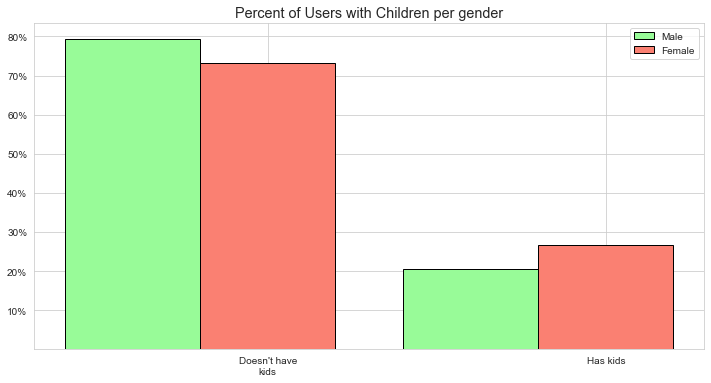

In [70]:
plt.figure(figsize=(12,6))

kids_values_male = [len(df[(df['sex_code']==0) & (df['has_kids']==0)])/
                        len(df[(df['sex_code']==0) & (df['has_kids']>=0)]),
                        len(df[(df['sex_code']==0) & (df['has_kids']>=1)])/
                       len(df[(df['sex_code']==0) & (df['has_kids']>=0)])]

kids_values_female = [len(df[(df['sex_code']==1) & (df['has_kids']==0)])/
                  len(df[(df['sex_code']==1) & (df['has_kids']>=0)]),
                  len(df[(df['sex_code']==1) & (df['has_kids']>=1)])/
                  len(df[(df['sex_code']==1) & (df['has_kids']>=0)])]


kids_labels = ['Doesn\'t have\nkids', 'Has kids']

male_pos = [2*element + 0.8*1 for element in range(2)]
female_pos = [2*element + 0.8*2 for element in range(2)]


plt.bar(male_pos, kids_values_male, edgecolor='black', color='PaleGreen', label='Male')
plt.bar(female_pos, kids_values_female, edgecolor='black', color='Salmon', label='Female')


plt.xticks([2*element + 0.8*2 for element in range(2)], kids_labels)
plt.yticks([0.1*i for i in range(1,9)],['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%'])
plt.legend()
plt.title('Percent of Users with Children per gender', fontsize='x-large')

plt.show()

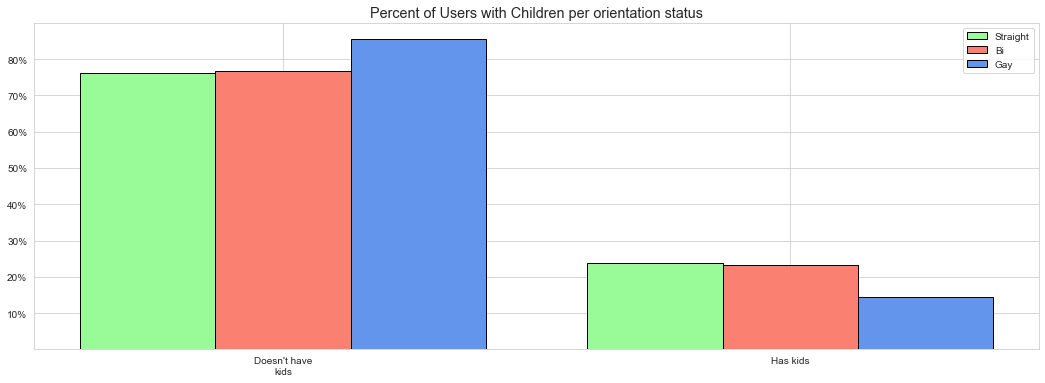

In [71]:
plt.figure(figsize=(18,6))

kids_values_straight = [len(df[(df['orientation_code']==-1) & (df['has_kids']==0)])/
                        len(df[(df['orientation_code']==-1) & (df['has_kids']>=0)]),
                        len(df[(df['orientation_code']==-1) & (df['has_kids']>=1)])/
                       len(df[(df['orientation_code']==-1) & (df['has_kids']>=0)])]

kids_values_bi = [len(df[(df['orientation_code']==0) & (df['has_kids']==0)])/
                  len(df[(df['orientation_code']==0) & (df['has_kids']>=0)]),
                  len(df[(df['orientation_code']==0) & (df['has_kids']>=1)])/
                  len(df[(df['orientation_code']==0) & (df['has_kids']>=0)])]

kids_values_gay = [len(df[(df['orientation_code']==1) & (df['has_kids']==0)])/
                   len(df[(df['orientation_code']==1) & (df['has_kids']>=0)]),
                   len(df[(df['orientation_code']==1) & (df['has_kids']>=1)])/
                  len(df[(df['orientation_code']==1) & (df['has_kids']>=0)])]

kids_labels = ['Doesn\'t have\nkids', 'Has kids']

straight_pos = [3*element + 0.8*1 for element in range(2)]
bi_pos = [3*element + 0.8*2 for element in range(2)]
gay_pos = [3*element + 0.8*3 for element in range(2)]

plt.bar(straight_pos, kids_values_straight, edgecolor='black', color='PaleGreen', label='Straight')
plt.bar(bi_pos, kids_values_bi, edgecolor='black', color='Salmon', label='Bi')
plt.bar(gay_pos, kids_values_gay, edgecolor='black', color='CornflowerBlue', label='Gay')

plt.xticks([3*element + 0.8*2 for element in range(2)], kids_labels)
plt.yticks([0.1*i for i in range(1,9)],['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%'])
plt.legend()
plt.title('Percent of Users with Children per orientation status', fontsize='x-large')

plt.show()

## Data Preparation for Machine Learning Algorithms

#### Missing Data

In [72]:
df.isnull().sum()

age                               0
body_type                      5296
diet                              0
drinks                            0
drugs                             0
education                      6628
essay0                         5488
essay1                         7572
essay2                         9638
essay3                        11476
essay4                        10537
essay5                        10850
essay6                        13771
essay7                        12451
essay8                        19225
essay9                        12603
ethnicity                         0
height                            3
income                            0
job                            8198
last_online                       0
location                          0
offspring                         0
orientation                       0
pets                              0
religion                      20226
sex                               0
sign                        

Missing data is often not handled by machine learning algorithms well and have to be checked so they may need to be imputed or removed.

#### Preprocessing

Preparing the data for modeling is important since it can speed up the process and produce better models. As the adage goes, "garbage in garbage out" so we want to make sure the data we are inputing into our modelling step is good enough to share with others.

In [73]:
cols = ['status', 'sex', 'orientation', 'diet', 'drinks', 'drugs',
          'body_type', 'job', 'clean_religion', 'clean_sign']

df_2 = df[cols].dropna()
df_2.shape


(30268, 10)

Now `df_2` contains 10 columns and 30268 rows and it will be a dataframe I will work on it using machine learning models. 

#### Dummy Variables

In this next step, dummy variables are created to deal with the categorical variables. Dummy variables will turn the categories per variable into its own binary identifier. The data now has 81 columns to predict signs. 

In [74]:
for col in cols[:-1]:
    df_2 = pd.get_dummies(df_2, columns=[col], prefix = [col])

In [75]:
df_2.head()

,clean_sign,status_available,status_married,status_seeing someone,status_single,status_unknown,sex_f,sex_m,orientation_bisexual,orientation_gay,...,job_unemployed,clean_religion_agnosticism,clean_religion_atheism,clean_religion_buddhism,clean_religion_catholicism,clean_religion_christianity,clean_religion_hinduism,clean_religion_islam,clean_religion_judaism,clean_religion_other
0,gemini,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,cancer,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
5,taurus,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7,sagittarius,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,cancer,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Label imbalance

An imbalance in the prediction label needs to be checked. This is important since it's a multi-class problem where two or more outcomes can be had. An imbalance in a response variable is bad since it means that some labels only occur a few times. This is an issue for machine learning algorithms if there are not enough data to train with which will give bad predictions.

In the given dataset, we observe that the counts of all the zodiac signs are more or less equal (i.e., without large deviations). Hence, we do not have to worry about imbalances and trying to address this problem.

In [76]:
df_2.clean_sign.value_counts()

gemini         2754
leo            2703
cancer         2623
virgo          2591
libra          2580
taurus         2547
scorpio        2498
aries          2486
pisces         2425
sagittarius    2417
aquarius       2409
capricorn      2235
Name: clean_sign, dtype: int64

#### Splitting Data

The `data` for the model is going to be a subset of the variables.  Created a variable named `labels` and set it equal to the column `clean_sign`.

In [77]:
col_length = len(df_2.columns)

data = df_2.iloc[:, 1:col_length]
labels = df_2.iloc[:, 0:1]

#### Normalizing The Data

In [78]:
from sklearn.preprocessing import scale

scaled_data = scale(data, axis = 0)

#### Making a Training and Test Set

I can now break our data into a training set and a test set. I'll use scikit-learn's train_test_split function to do this split. This function takes two required parameters: It takes the data, followed by the labels. Set the optional parameter test_size to be **0.2**. Finally, set the optional parameter random_state to **1**. This will make it so your data is split in the same way as the data in our solution code

In [79]:
from sklearn.model_selection import train_test_split 

train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size = 0.2, random_state = 1)

#turn in to 1d arrays
train_labels = train_labels.to_numpy().ravel()
test_labels = test_labels.to_numpy().ravel()

#### Model Building

Below, the respective modules for Logistic Regression, Decision Trees, and KNN are loaded.

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### Evaluation Metrics

In the models, there will be several values that can be evaluated:

- **Accuracy:** is the correct values divided by total values
- **Precision:** is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values.
- **Recall:** is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses.
- **F1-score:** is a blended score of precision and recall which balances both values.
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict. 

## Logistic Regression

In [81]:
lrm = LogisticRegression(multi_class='multinomial')
lrm.fit(train_data, train_labels)
lrm_predictions = lrm.predict(train_data)

The final accuracy of the logistic regression model is ~11% which is terrible considering a random guess should result in being correct ~8% of the time (1/12).

In [82]:
from sklearn.metrics import classification_report

print(classification_report(train_labels, lrm_predictions))

              precision    recall  f1-score   support

    aquarius       0.12      0.06      0.08      1911
       aries       0.10      0.09      0.10      1984
      cancer       0.11      0.20      0.14      2129
   capricorn       0.12      0.04      0.06      1791
      gemini       0.11      0.25      0.15      2196
         leo       0.11      0.16      0.13      2191
       libra       0.10      0.08      0.09      2020
      pisces       0.10      0.06      0.08      1940
 sagittarius       0.10      0.07      0.09      1928
     scorpio       0.11      0.05      0.07      2003
      taurus       0.11      0.10      0.11      2066
       virgo       0.10      0.10      0.10      2055

    accuracy                           0.11     24214
   macro avg       0.11      0.11      0.10     24214
weighted avg       0.11      0.11      0.10     24214



## K Nearest Neighbors

The next models is the `KNeighborsClassifier` . The default value for n_neighbors is 5 which was kept. This number can be tuned later on if needed.

In [83]:
k_model = KNeighborsClassifier(n_neighbors=5)
k_model.fit(train_data, train_labels)
k_predictions = k_model.predict(train_data)

The final accuracy of K Nearest Neighbors model is 32% which is not so bad results compared to logistic regression model.

In [84]:
print(classification_report(train_labels, k_predictions))

              precision    recall  f1-score   support

    aquarius       0.25      0.64      0.35      1911
       aries       0.26      0.49      0.34      1984
      cancer       0.28      0.43      0.34      2129
   capricorn       0.32      0.33      0.33      1791
      gemini       0.35      0.33      0.34      2196
         leo       0.39      0.29      0.33      2191
       libra       0.40      0.25      0.31      2020
      pisces       0.40      0.22      0.28      1940
 sagittarius       0.40      0.23      0.29      1928
     scorpio       0.40      0.22      0.28      2003
      taurus       0.41      0.23      0.29      2066
       virgo       0.39      0.21      0.27      2055

    accuracy                           0.32     24214
   macro avg       0.35      0.32      0.31     24214
weighted avg       0.36      0.32      0.31     24214



#### Choosing k

I've tested our classifier with `k = 5`, but maybe there's a `k` that will work better. Let's test many different values for `k` and graph the results. 

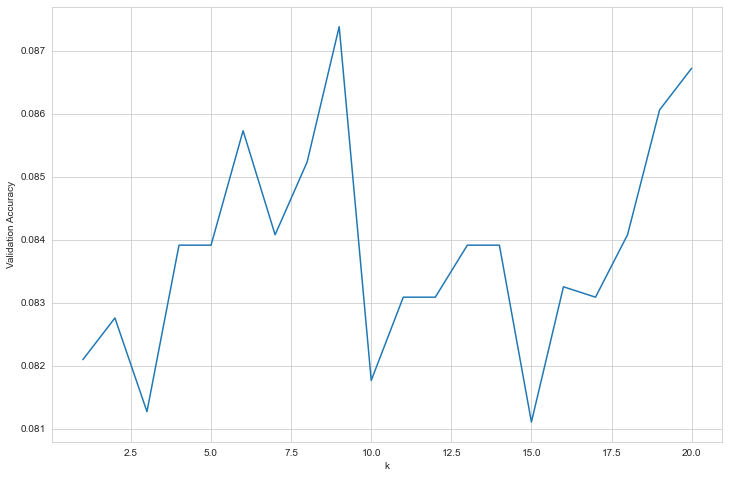

In [85]:
scores = []
for k in range(1, 21):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
    
k_list = range(1, 21)
plt.figure(figsize=(12,8))
plt.plot(k_list, scores)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.show()

## Decision Trees

The `Decision Trees` model, the default max_depth is none which means that it will _"If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples."_. 

In [86]:
tree_model = DecisionTreeClassifier()
tree_model.fit(train_data, train_labels)
tree_predictions = tree_model.predict(train_data)

The final accuracy of Decision Trees model is 72% which is so far the best result I received. 

In [87]:
print(classification_report(train_labels, tree_predictions))

              precision    recall  f1-score   support

    aquarius       0.56      0.89      0.69      1911
       aries       0.61      0.84      0.71      1984
      cancer       0.64      0.81      0.72      2129
   capricorn       0.71      0.78      0.74      1791
      gemini       0.71      0.73      0.72      2196
         leo       0.76      0.72      0.74      2191
       libra       0.76      0.69      0.72      2020
      pisces       0.79      0.68      0.73      1940
 sagittarius       0.85      0.65      0.73      1928
     scorpio       0.83      0.65      0.73      2003
      taurus       0.87      0.63      0.73      2066
       virgo       0.88      0.60      0.71      2055

    accuracy                           0.72     24214
   macro avg       0.75      0.72      0.72     24214
weighted avg       0.75      0.72      0.72     24214



Below is a confusion matrix of the results with the true values on the y axis and predicted values along the x axis. Since the diagonals are lighter in color and have higher numbers, the accuracy is going to be high since those are the True Positives.

In [88]:
from sklearn.metrics import confusion_matrix 

tree_cm = confusion_matrix(train_labels, tree_predictions)
cart_labels = tree_model.classes_

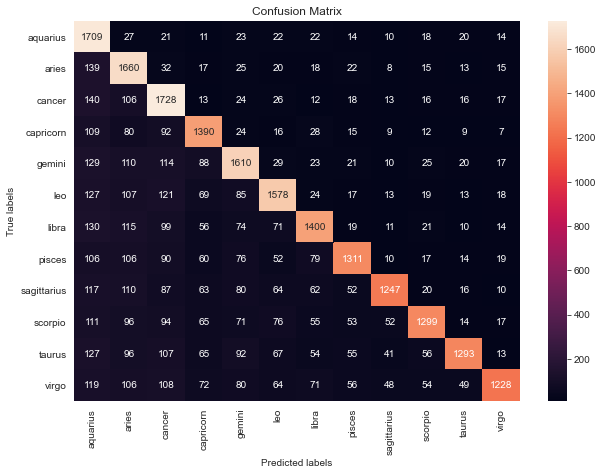

In [89]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(tree_cm, annot=True, ax = ax,fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels);
ax.yaxis.set_ticklabels(cart_labels);

Going back to the model, a quick analysis will show that this tree model has a depth of 58 branches, which will probably not generalize to another dataset. In this case this model has been "overfit" for this data. 

In [90]:
tree_model.get_depth()

58

The decision tree model will be made it again, but with a `max_depth` of 30 to stop the algorithm from reaching the stopping point.

In [91]:
tree_model_30 = DecisionTreeClassifier(max_depth=30)
tree_model_30.fit(train_data, train_labels)
tree_predictions_30 = tree_model_30.predict(train_data)

In [92]:
print(classification_report(train_labels, tree_predictions_30))

              precision    recall  f1-score   support

    aquarius       0.52      0.61      0.56      1911
       aries       0.58      0.60      0.59      1984
      cancer       0.40      0.64      0.49      2129
   capricorn       0.62      0.55      0.58      1791
      gemini       0.57      0.55      0.56      2196
         leo       0.67      0.52      0.59      2191
       libra       0.41      0.57      0.47      2020
      pisces       0.40      0.55      0.47      1940
 sagittarius       0.72      0.48      0.57      1928
     scorpio       0.68      0.49      0.57      2003
      taurus       0.64      0.48      0.55      2066
       virgo       0.72      0.46      0.56      2055

    accuracy                           0.54     24214
   macro avg       0.58      0.54      0.55     24214
weighted avg       0.58      0.54      0.55     24214



The new accuracy rate of 54% is worse than the first iteration, but better than the KNN model and Logistic Regression model.

## Random Forest

In [93]:
random_model = RandomForestClassifier()
random_model.fit(train_data, train_labels)
random_predictions = random_model.predict(train_data)

In [94]:
print(classification_report(train_labels, random_predictions))

              precision    recall  f1-score   support

    aquarius       0.69      0.72      0.70      1911
       aries       0.70      0.72      0.71      1984
      cancer       0.70      0.73      0.72      2129
   capricorn       0.74      0.73      0.74      1791
      gemini       0.72      0.71      0.71      2196
         leo       0.74      0.72      0.73      2191
       libra       0.71      0.71      0.71      2020
      pisces       0.71      0.73      0.72      1940
 sagittarius       0.74      0.72      0.73      1928
     scorpio       0.73      0.73      0.73      2003
      taurus       0.74      0.72      0.73      2066
       virgo       0.72      0.71      0.72      2055

    accuracy                           0.72     24214
   macro avg       0.72      0.72      0.72     24214
weighted avg       0.72      0.72      0.72     24214



The final accuracy of Random Forest model is 72% but like in Decision Trees model could be overfit. 

### Final Model

In [95]:
k_predictions_val = k_model.predict(test_data)
print(classification_report(test_labels, k_predictions_val))

              precision    recall  f1-score   support

    aquarius       0.09      0.21      0.12       498
       aries       0.08      0.16      0.11       502
      cancer       0.08      0.12      0.09       494
   capricorn       0.07      0.08      0.08       444
      gemini       0.09      0.08      0.08       558
         leo       0.10      0.08      0.09       512
       libra       0.08      0.05      0.06       560
      pisces       0.08      0.04      0.06       485
 sagittarius       0.09      0.05      0.06       489
     scorpio       0.08      0.04      0.05       495
      taurus       0.08      0.05      0.06       481
       virgo       0.10      0.05      0.06       536

    accuracy                           0.08      6054
   macro avg       0.08      0.08      0.08      6054
weighted avg       0.08      0.08      0.08      6054



In [96]:
lrm_predictions_val = lrm.predict(test_data)
print(classification_report(test_labels, lrm_predictions_val))

              precision    recall  f1-score   support

    aquarius       0.08      0.05      0.06       498
       aries       0.08      0.07      0.08       502
      cancer       0.09      0.18      0.12       494
   capricorn       0.08      0.03      0.04       444
      gemini       0.10      0.22      0.14       558
         leo       0.08      0.13      0.10       512
       libra       0.11      0.07      0.09       560
      pisces       0.09      0.05      0.07       485
 sagittarius       0.08      0.06      0.07       489
     scorpio       0.08      0.03      0.05       495
      taurus       0.09      0.09      0.09       481
       virgo       0.09      0.09      0.09       536

    accuracy                           0.09      6054
   macro avg       0.09      0.09      0.08      6054
weighted avg       0.09      0.09      0.08      6054



In [97]:
tree_predictions_val = tree_model_30.predict(test_data)
print(classification_report(test_labels, tree_predictions_val))

              precision    recall  f1-score   support

    aquarius       0.09      0.10      0.09       498
       aries       0.09      0.09      0.09       502
      cancer       0.10      0.16      0.12       494
   capricorn       0.08      0.07      0.07       444
      gemini       0.08      0.08      0.08       558
         leo       0.10      0.08      0.09       512
       libra       0.09      0.11      0.10       560
      pisces       0.09      0.12      0.10       485
 sagittarius       0.08      0.06      0.06       489
     scorpio       0.09      0.06      0.07       495
      taurus       0.08      0.07      0.07       481
       virgo       0.11      0.07      0.09       536

    accuracy                           0.09      6054
   macro avg       0.09      0.09      0.09      6054
weighted avg       0.09      0.09      0.09      6054



In [98]:
random_predictions_val = random_model.predict(test_data)
print(classification_report(test_labels, random_predictions_val))

              precision    recall  f1-score   support

    aquarius       0.11      0.10      0.10       498
       aries       0.07      0.07      0.07       502
      cancer       0.08      0.10      0.09       494
   capricorn       0.07      0.07      0.07       444
      gemini       0.09      0.09      0.09       558
         leo       0.08      0.09      0.08       512
       libra       0.09      0.08      0.08       560
      pisces       0.07      0.07      0.07       485
 sagittarius       0.08      0.08      0.08       489
     scorpio       0.08      0.08      0.08       495
      taurus       0.07      0.07      0.07       481
       virgo       0.10      0.09      0.10       536

    accuracy                           0.08      6054
   macro avg       0.08      0.08      0.08      6054
weighted avg       0.08      0.08      0.08      6054



So it seems that the Decision Tree Model might be the best model for OkCupid to use when users don't have their signs listed on their user profile. By using the hold out or validation set, we get ~9% accuracy which is not very good.

## Conclusion

In this project machine learning was used to predict the astrological signs of OkCupid users. This is an important feature since many people believe in astrology and matches between compatible star signs. If users don't input their signs, an algorithmic solution could have generated a sign to impute missing data when making matches.

Alas, the final selected algorithm did no better than basic guessing.